In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

### Beam parameters

In [93]:
# number of sampling points
N = 2048
# photon energy in eV
E0 = 17795

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'rangeFactor': 5,
    'scaleFactor': 10,
    'z_source': 630
}

### Define beamline

In [94]:
# crystal asymmetry angle
alphaAsym = 27.98*np.pi/180

# distance between crystal 2 and 1st CRL, 2nd CRL and crystal 4 
f1 = 9.69
# distance between CRLs and focus
f2 = 10

# crystal reflection hkl index
hkl = [6,6,0]

# initialize the beam
b1 = beam.Beam(beam_params=beam_params)

# viewing point upstream of monochromator
im0 = optics.PPM('im0', z=870, FOV=2e-3, N=256)
crl0 = optics.CRL('crl0', z=830, roc=435e-6, diameter=2e-3)

# first crystal: symmetric reflection
crystal1 = optics.Crystal('c1', hkl=hkl, length=10e-2, width=20e-3, z=880, E0=E0,
                          alphaAsym=0, orientation=0, pol='s', delta=0.e-6)

# second crystal: asymmetric reflection, orientation flipped relative to crystal1
crystal2 = optics.Crystal('c2', hkl=hkl, length=10e-2, width=20e-3, z=crystal1.z+.2, E0=E0,alphaAsym=alphaAsym, 
                          orientation=2,pol='s', delta=0e-6)
# printing crystal incidence and reflection angles for confirmation
print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

im_upstream = optics.PPM('im_upstream', z=crystal2.z + f1 - .1, FOV=2e-3, N=256)

# CRL with ~1 meter focal length (modeled as single element for now)
crl1 = optics.CRL('crl1', z=crystal2.z+f1, roc=21e-6, diameter=5e-3)

# viewing point downstream of first crl
im1 = optics.PPM('im1', z=crl1.z+.1,N=256,FOV=2e-3)

# viewing point at focus
focus = optics.PPM('focus', z=crl1.z+f2+.03, FOV=100e-6, N=256)

# slit at focus
slit = optics.Slit('slit', z=crl1.z+f2 + 1e-3+.03, x_width=10e-6, y_width=2e-3)

# second CRL with ~1 meter focal length, for collimation
crl2 = optics.CRL('crl2', z=crl1.z+2*f2, roc=21e-6, diameter=5e-3)

# third crystal, symmetric reflection, same orientation as crystal2
crystal3 = optics.Crystal('c3', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+2, E0=E0,alphaAsym=0, orientation=2,
                         asym_type='emergence',pol='s')

# fourth crystal, asymmetric reflection, same orientation as crystal1
crystal4 = optics.Crystal('c4', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+2 + (f1-2)*np.cos(crystal1.beta0*2), E0=E0,alphaAsym=-alphaAsym, 
                          asym_type='emergence', orientation=0,pol='s')

# viewing point just downstream of monochromator
im2 = optics.PPM('im2', z=crystal4.z+.1, FOV=2e-3, N=256)

# list of devices to propagate through
devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, crl1, focus, slit, crl2, crystal3, crystal4, im2]
# devices = [im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices)

FWHM in x: 25.031580054003783 microns
FWHM in y: 25.031580054003783 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145623718254422
10.145623718254422
x is focused
y is focused
b 1.00
b 10.01
crystal 2 incidence angle: 60.96 degrees
crystal 2 exit angle: 5.01 degrees
b 1.00
b 0.10
after c1: 1.1511
after c2: -0.0002
after c3: -1.1513
after c4: -0.0002


In [75]:
print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

crystal 2 incidence angle: 60.96 degrees
crystal 2 exit angle: 5.01 degrees


### Propagation through monochromator at central photon energy

FWHM in x: 349.36734081211824 microns
FWHM in y: 349.36734081211824 microns
FWHM Divergence (x): 1.7 μrad
FWHM Divergence (y): 1.7 μrad
10.145630345874794
10.145630345874794
crl0
zRx: 7.06e+05
zRy: 1.45e+02
focal length: 202.91
zx: 13931.734177
zy: 200.000000
azimuth 0.00 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 705997963575.09 microns
zRy: 145496679.14 microns
remaining distance: 40000000.00 microns
goal for zx: 13971734176.79 microns
current zx: 13931734176.79 microns
goal for zy: 240000000.00 microns
current zy: 200000000.00 microns
current step size: 40000000.00 microns
x becomes focused
y stays unfocused
zx: 13971.734177
zy: 240.000000
azimuth 0.00 mrad
im0
zx: 13971.734177
zy: 240.000000
azimuth 0.00 mrad
drift2
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 705997963575.0

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


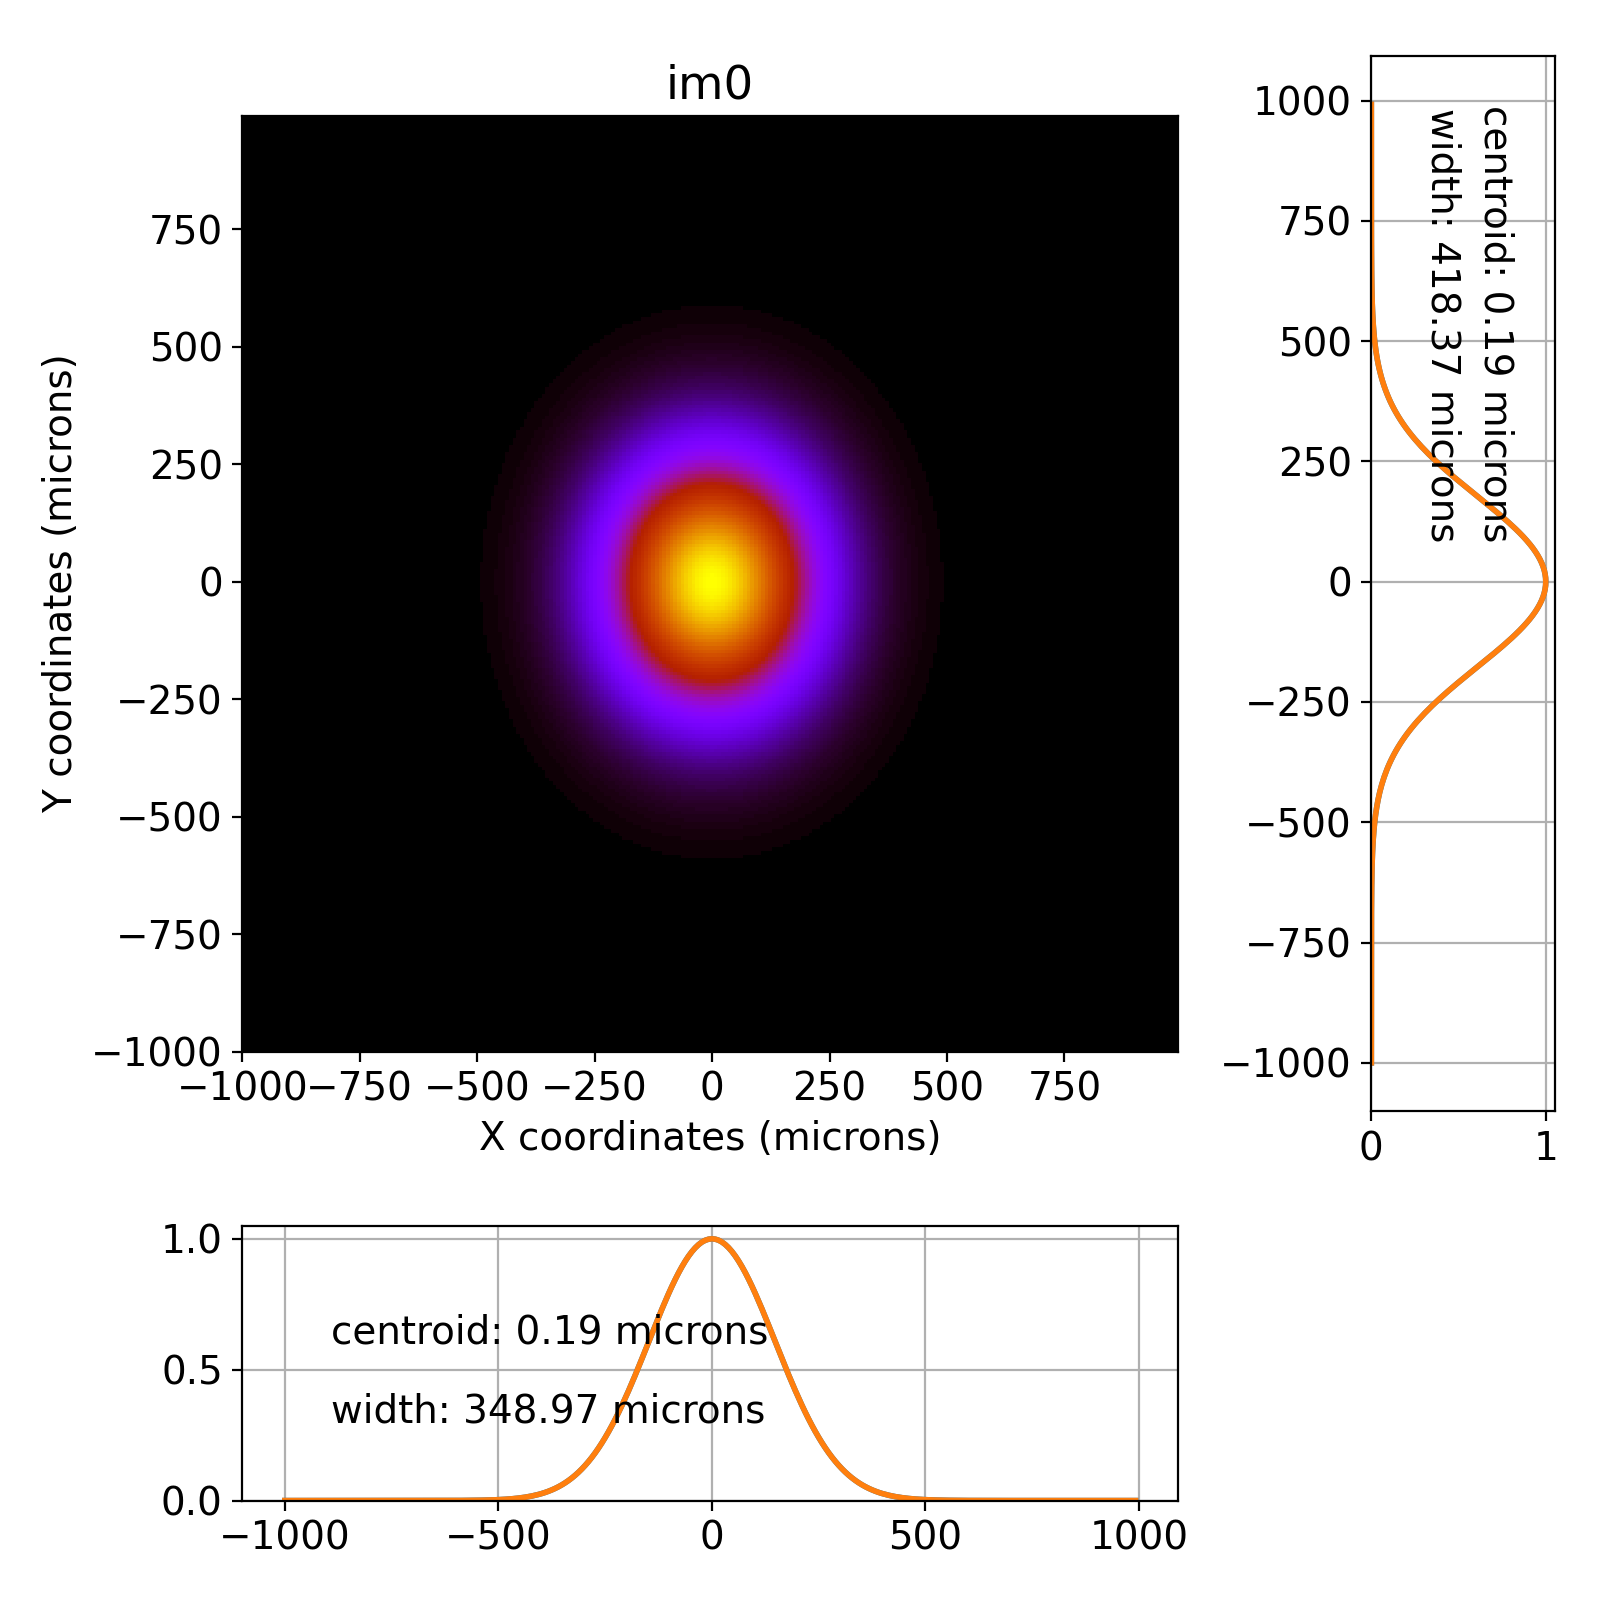

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


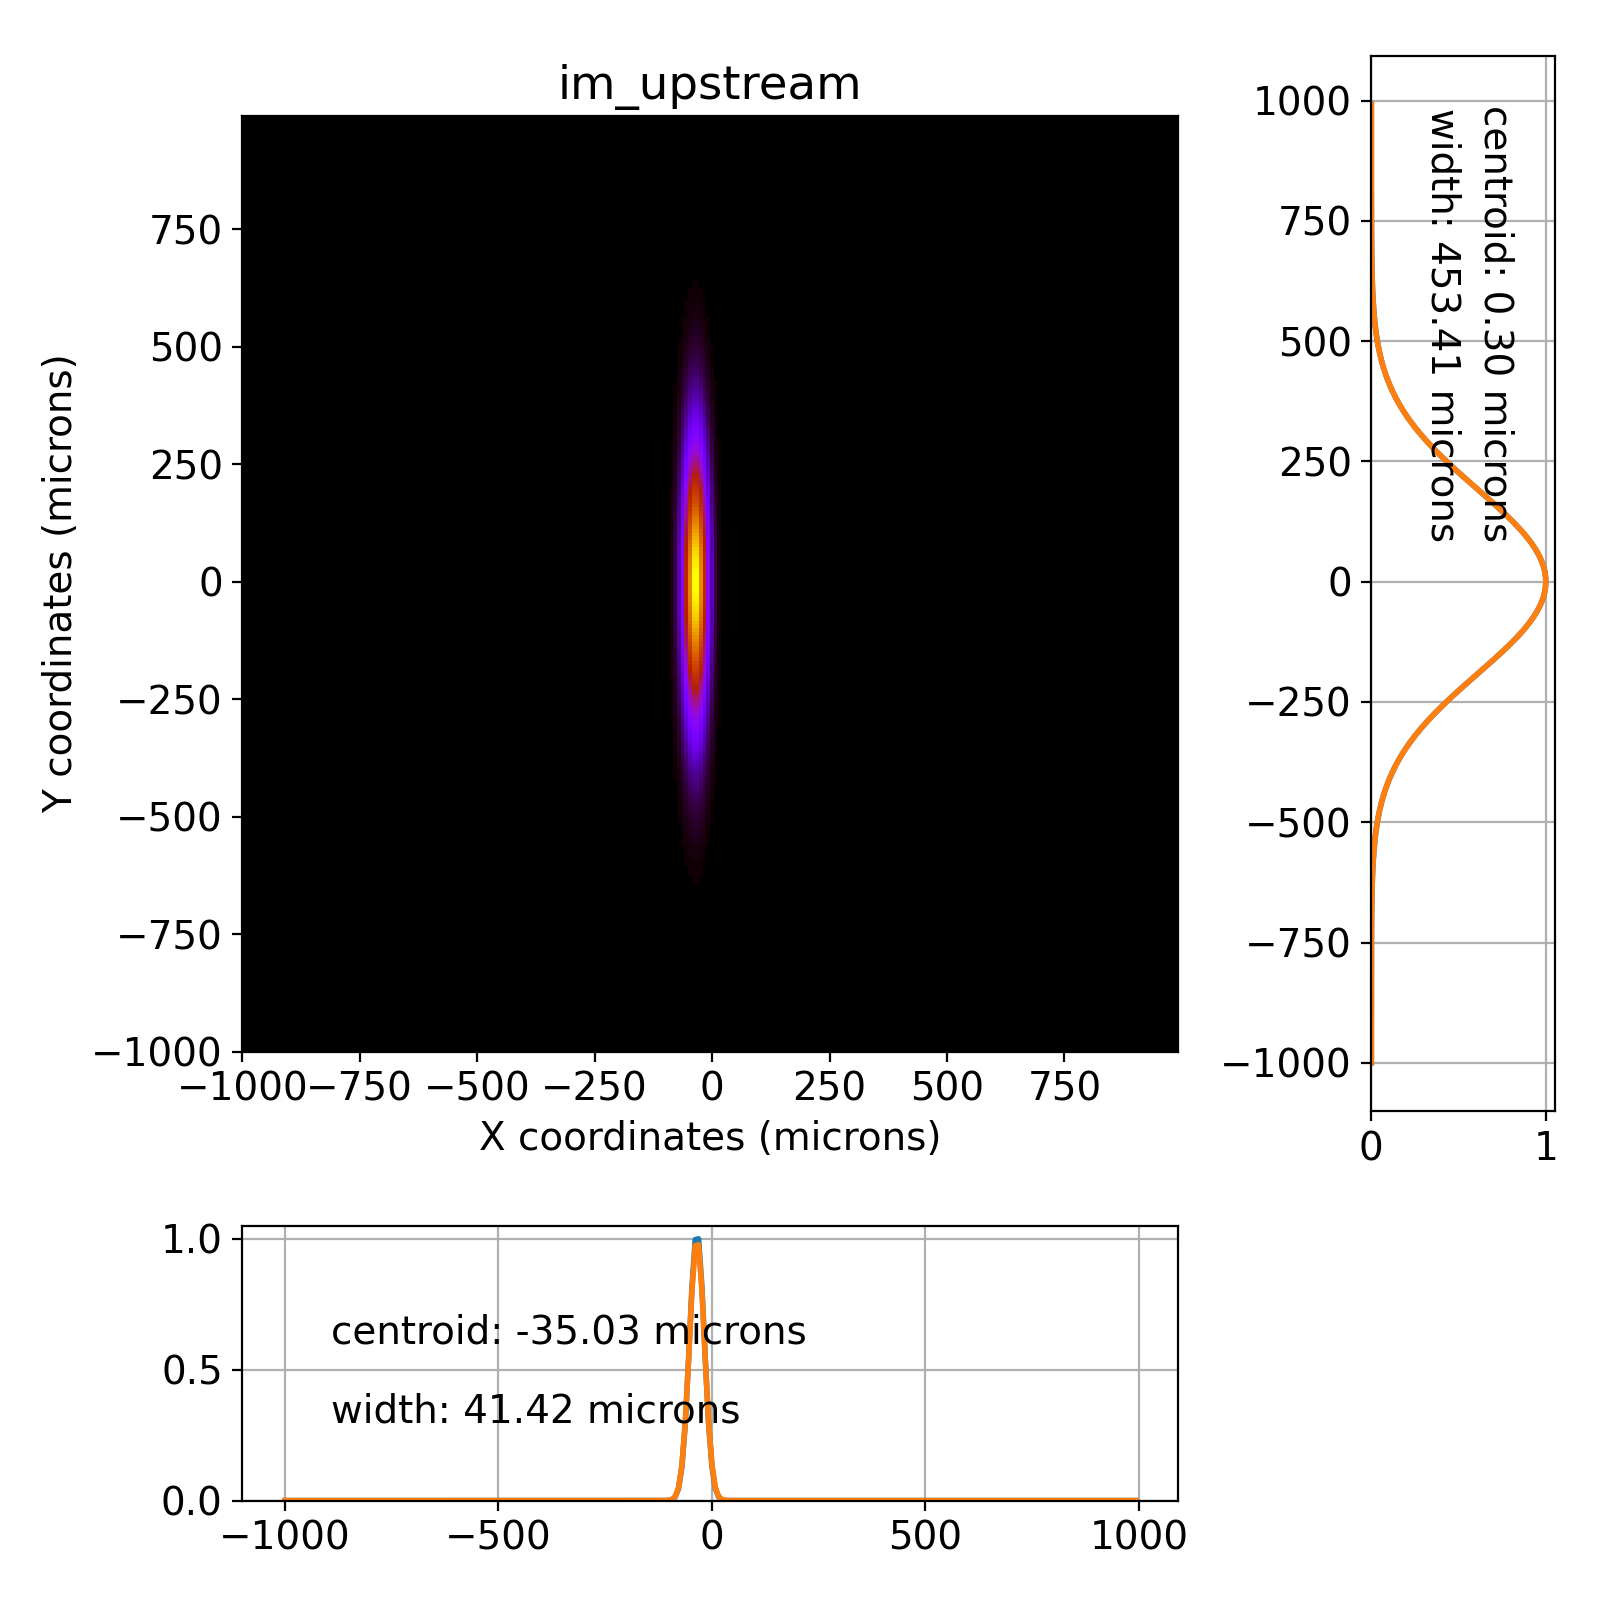

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


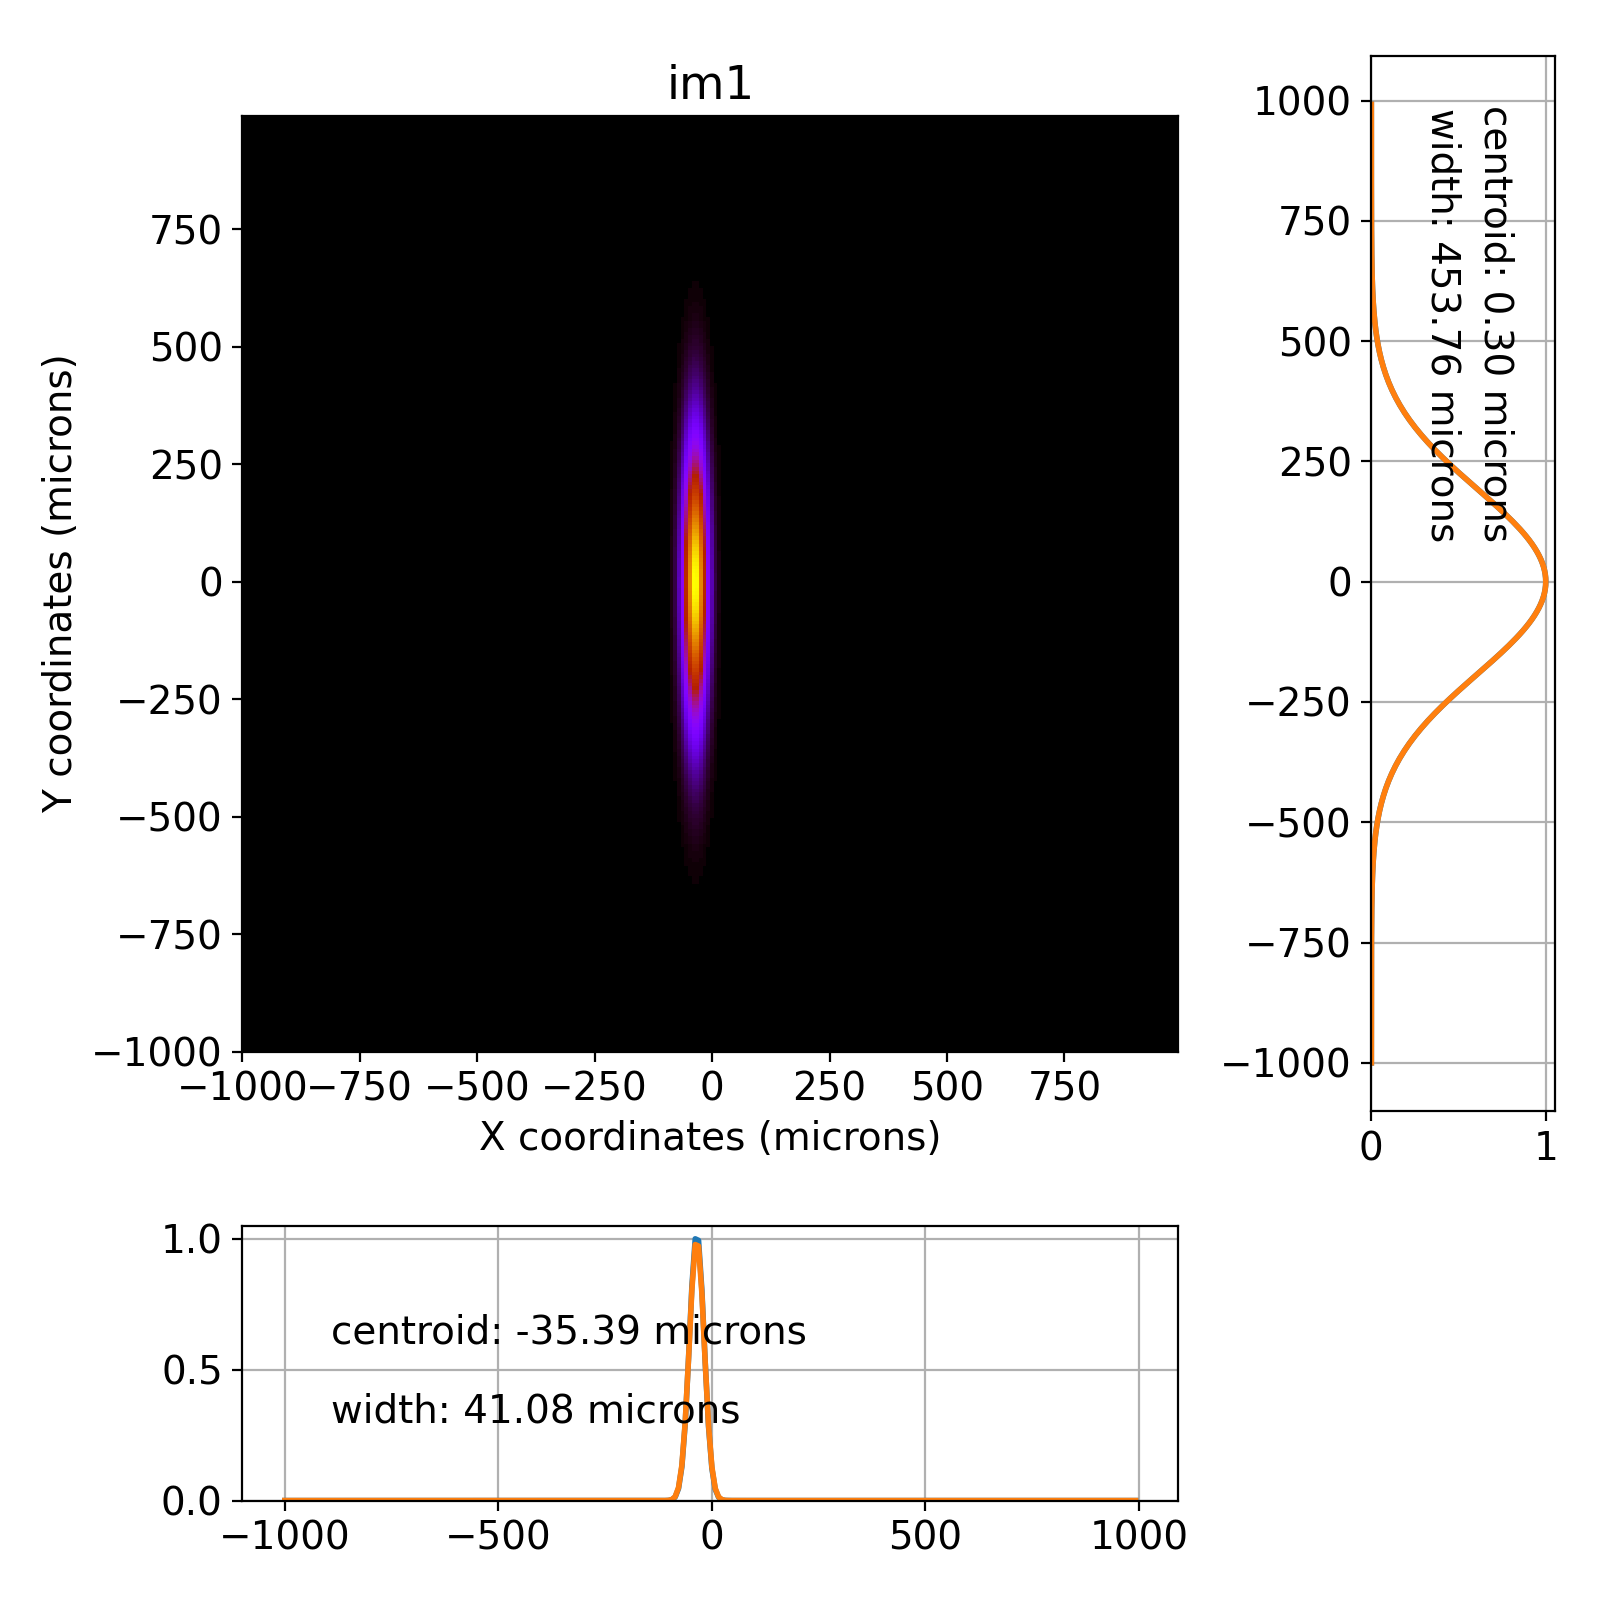

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


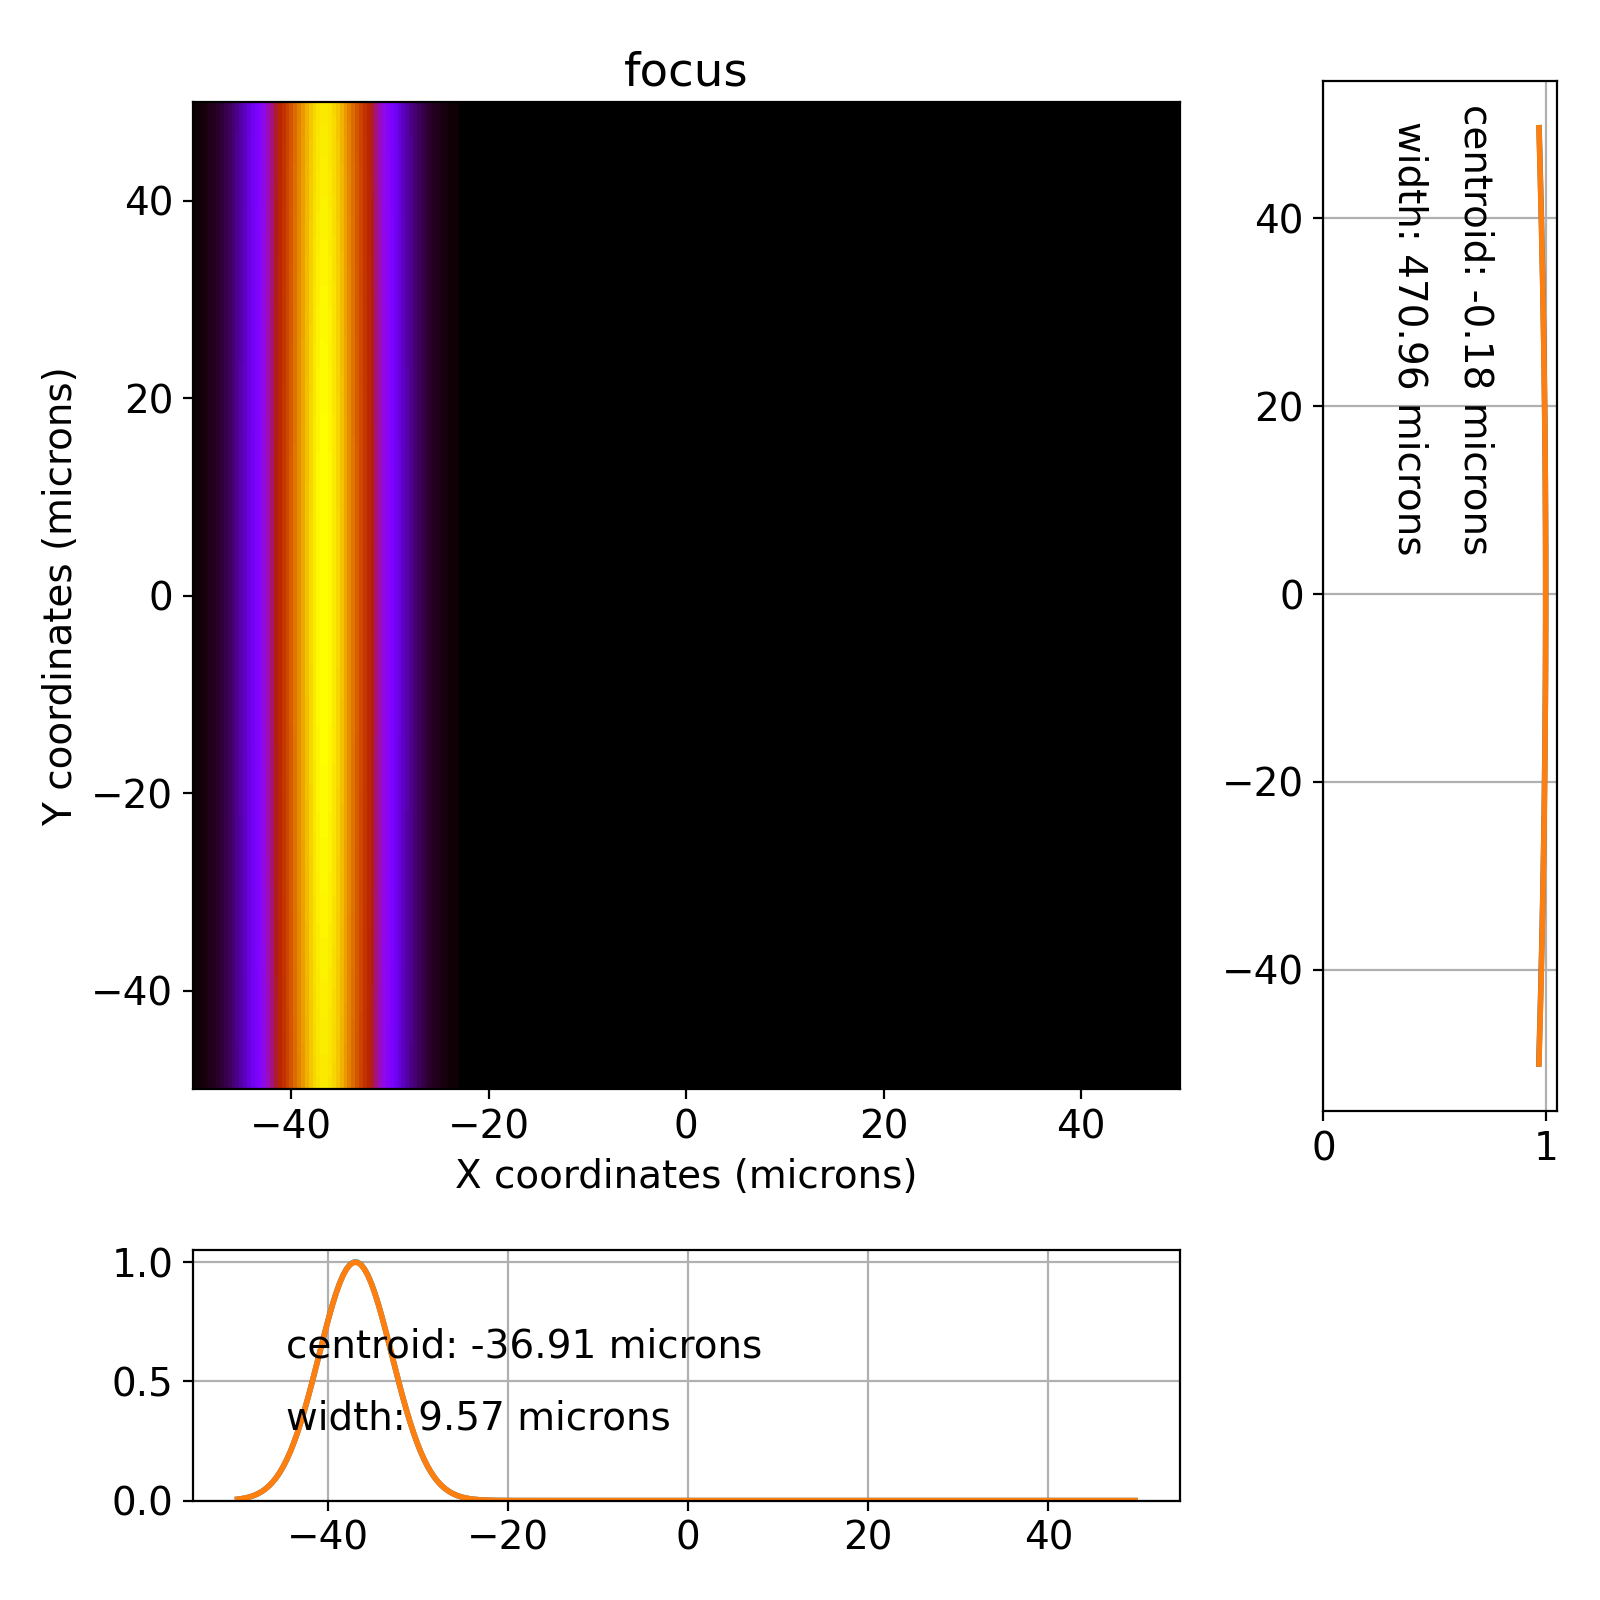

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


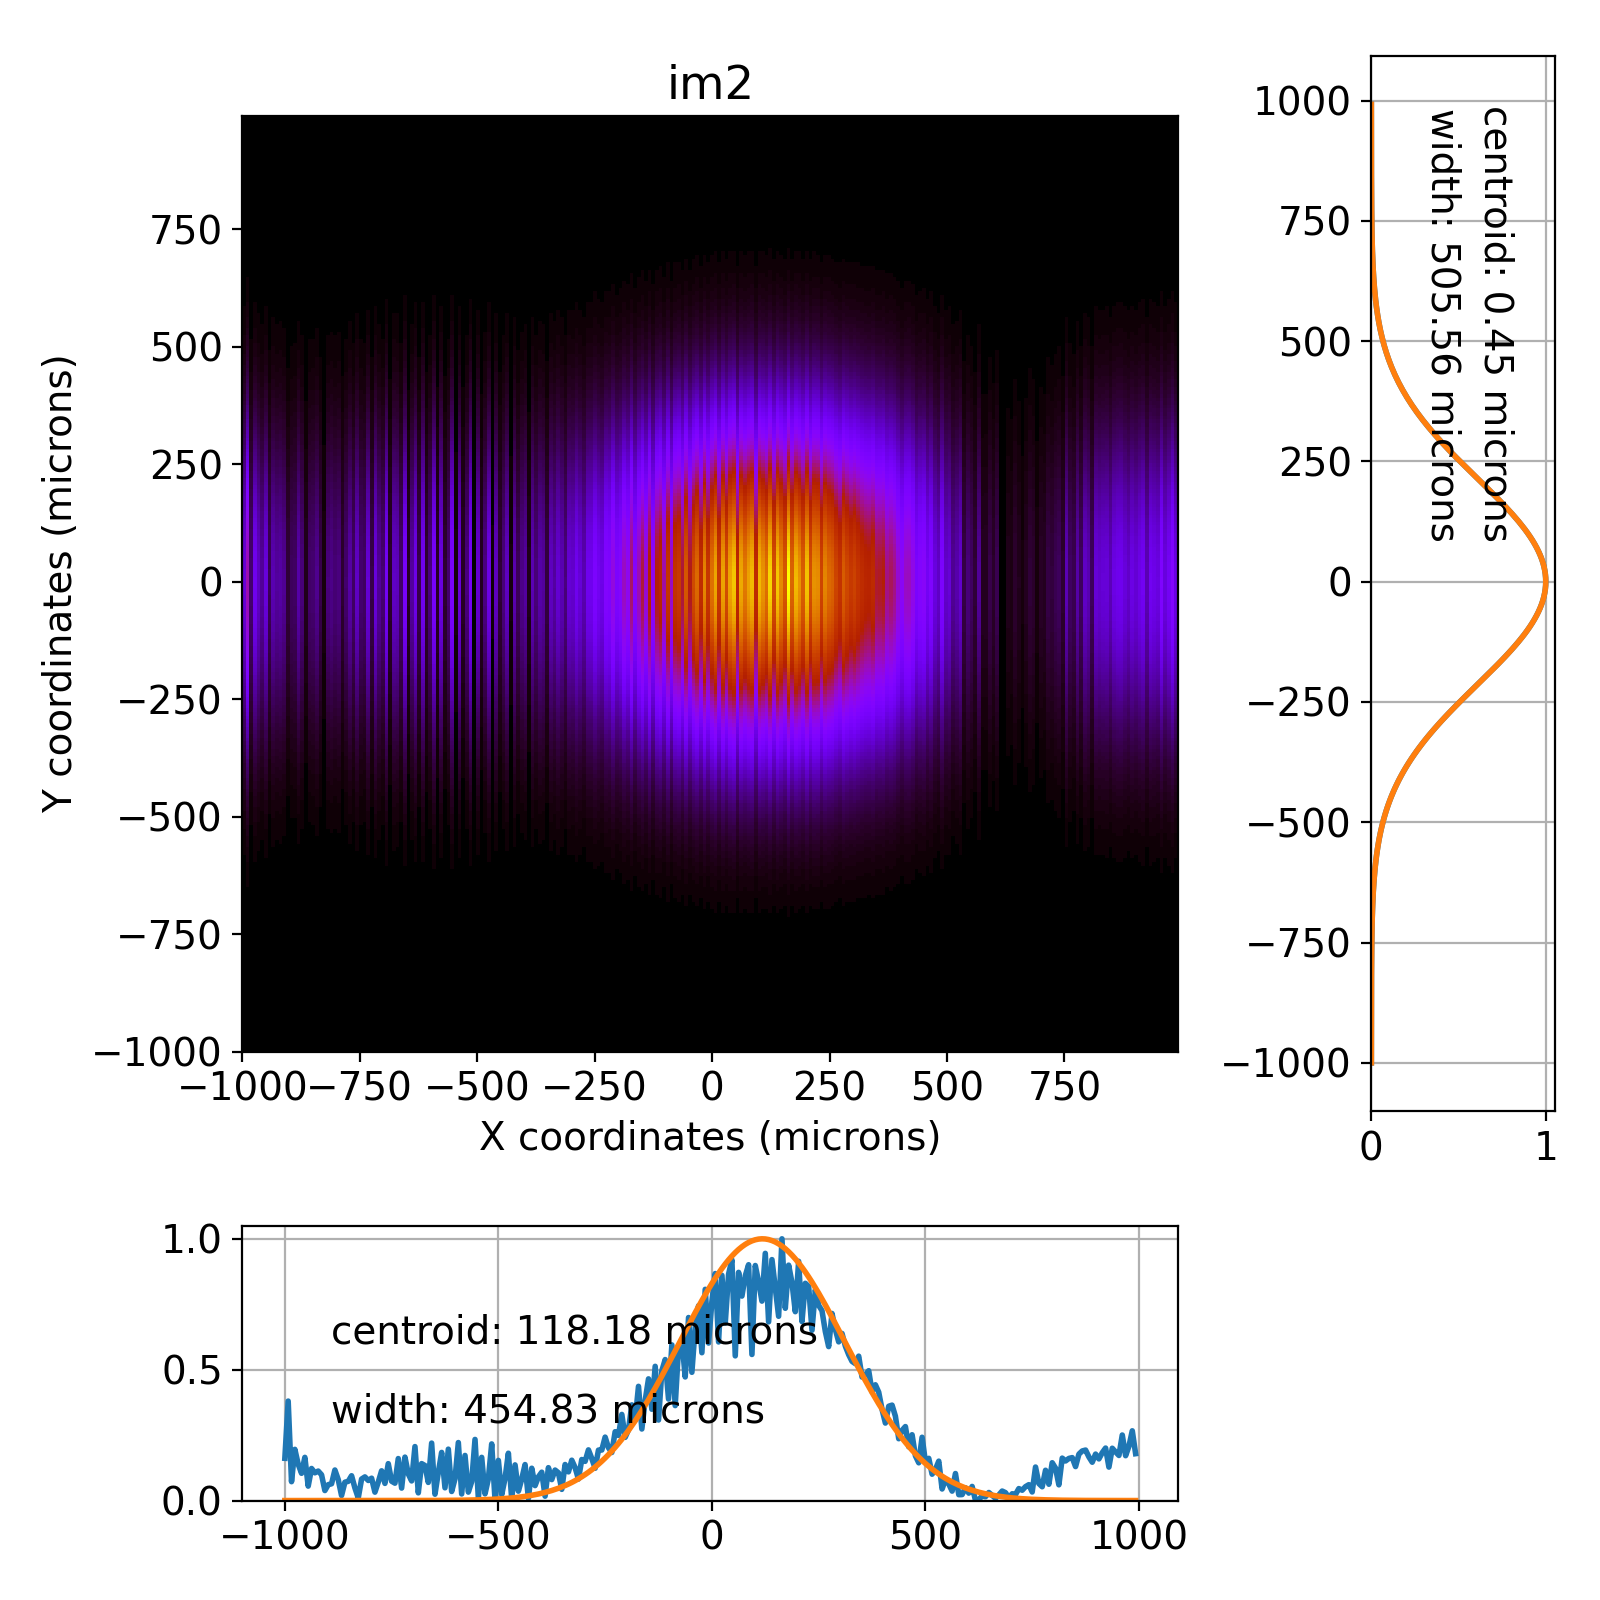

In [76]:
# propagate
b2 = mono_beamline.propagate_beamline(b1)

# view beam at various locations
mono_beamline.im0.view_beam()
mono_beamline.im_upstream.view_beam()
mono_beamline.im1.view_beam()
mono_beamline.focus.view_beam()
mono_beamline.im2.view_beam()

## Time-domain propagation

In [14]:
# reset central photon energy
beam_params['photonEnergy'] = 17795

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, tau=50, time_window=5000)

print('Number of spectral components: {:d}'.format(pulse.N))

Number of spectral components: 224


In [15]:
%%capture capt
# propagate pulse through beamline. This will take a minute or so (depends on number of spectral 
# components which is proportional to the ratio time_window/tau).
pulse.propagate(beamline=mono_beamline, screen_names=['im0','focus','im2'])

### Visualize input

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1826: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


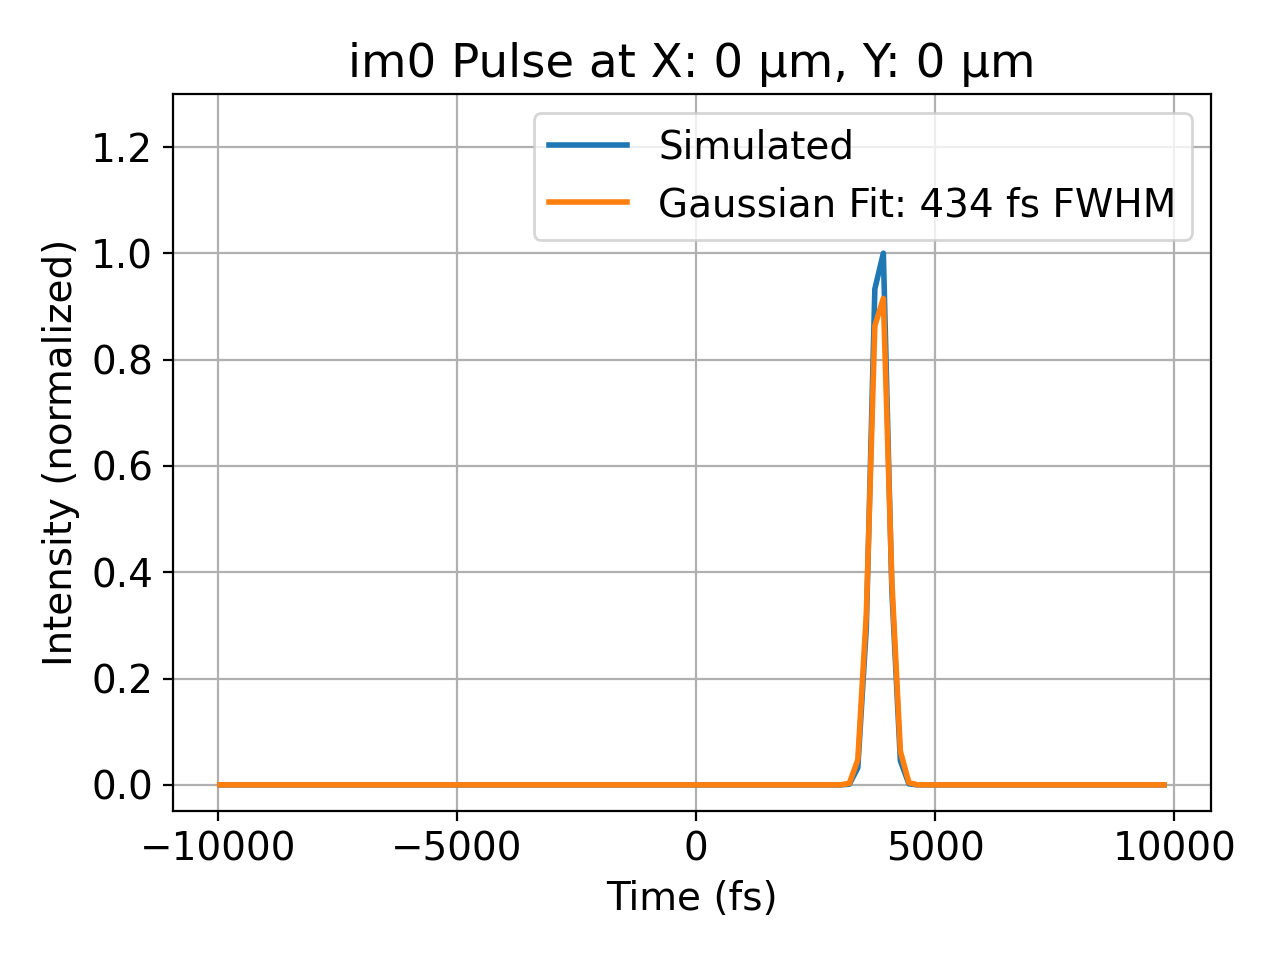

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1454: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


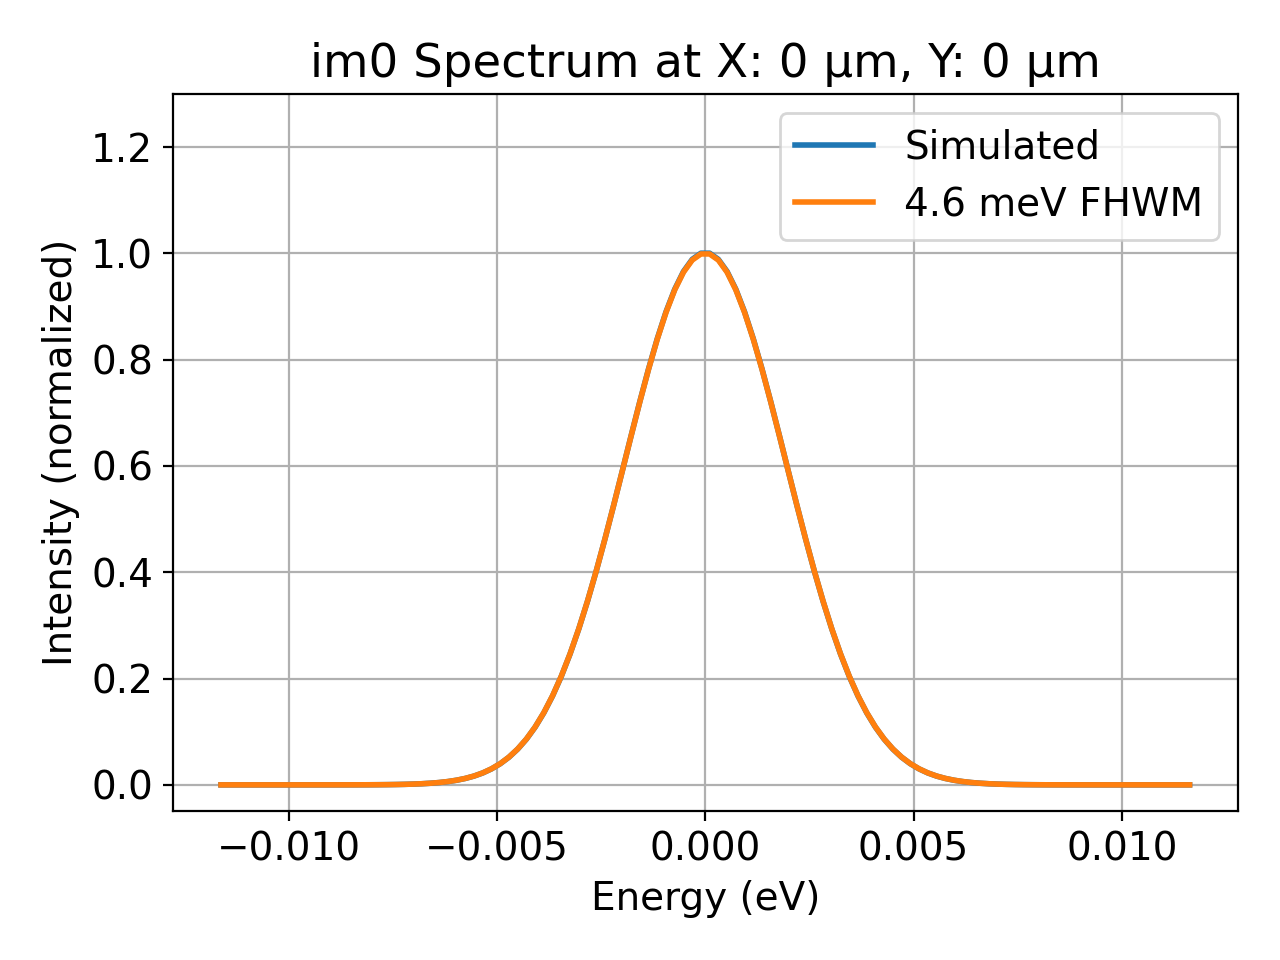

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


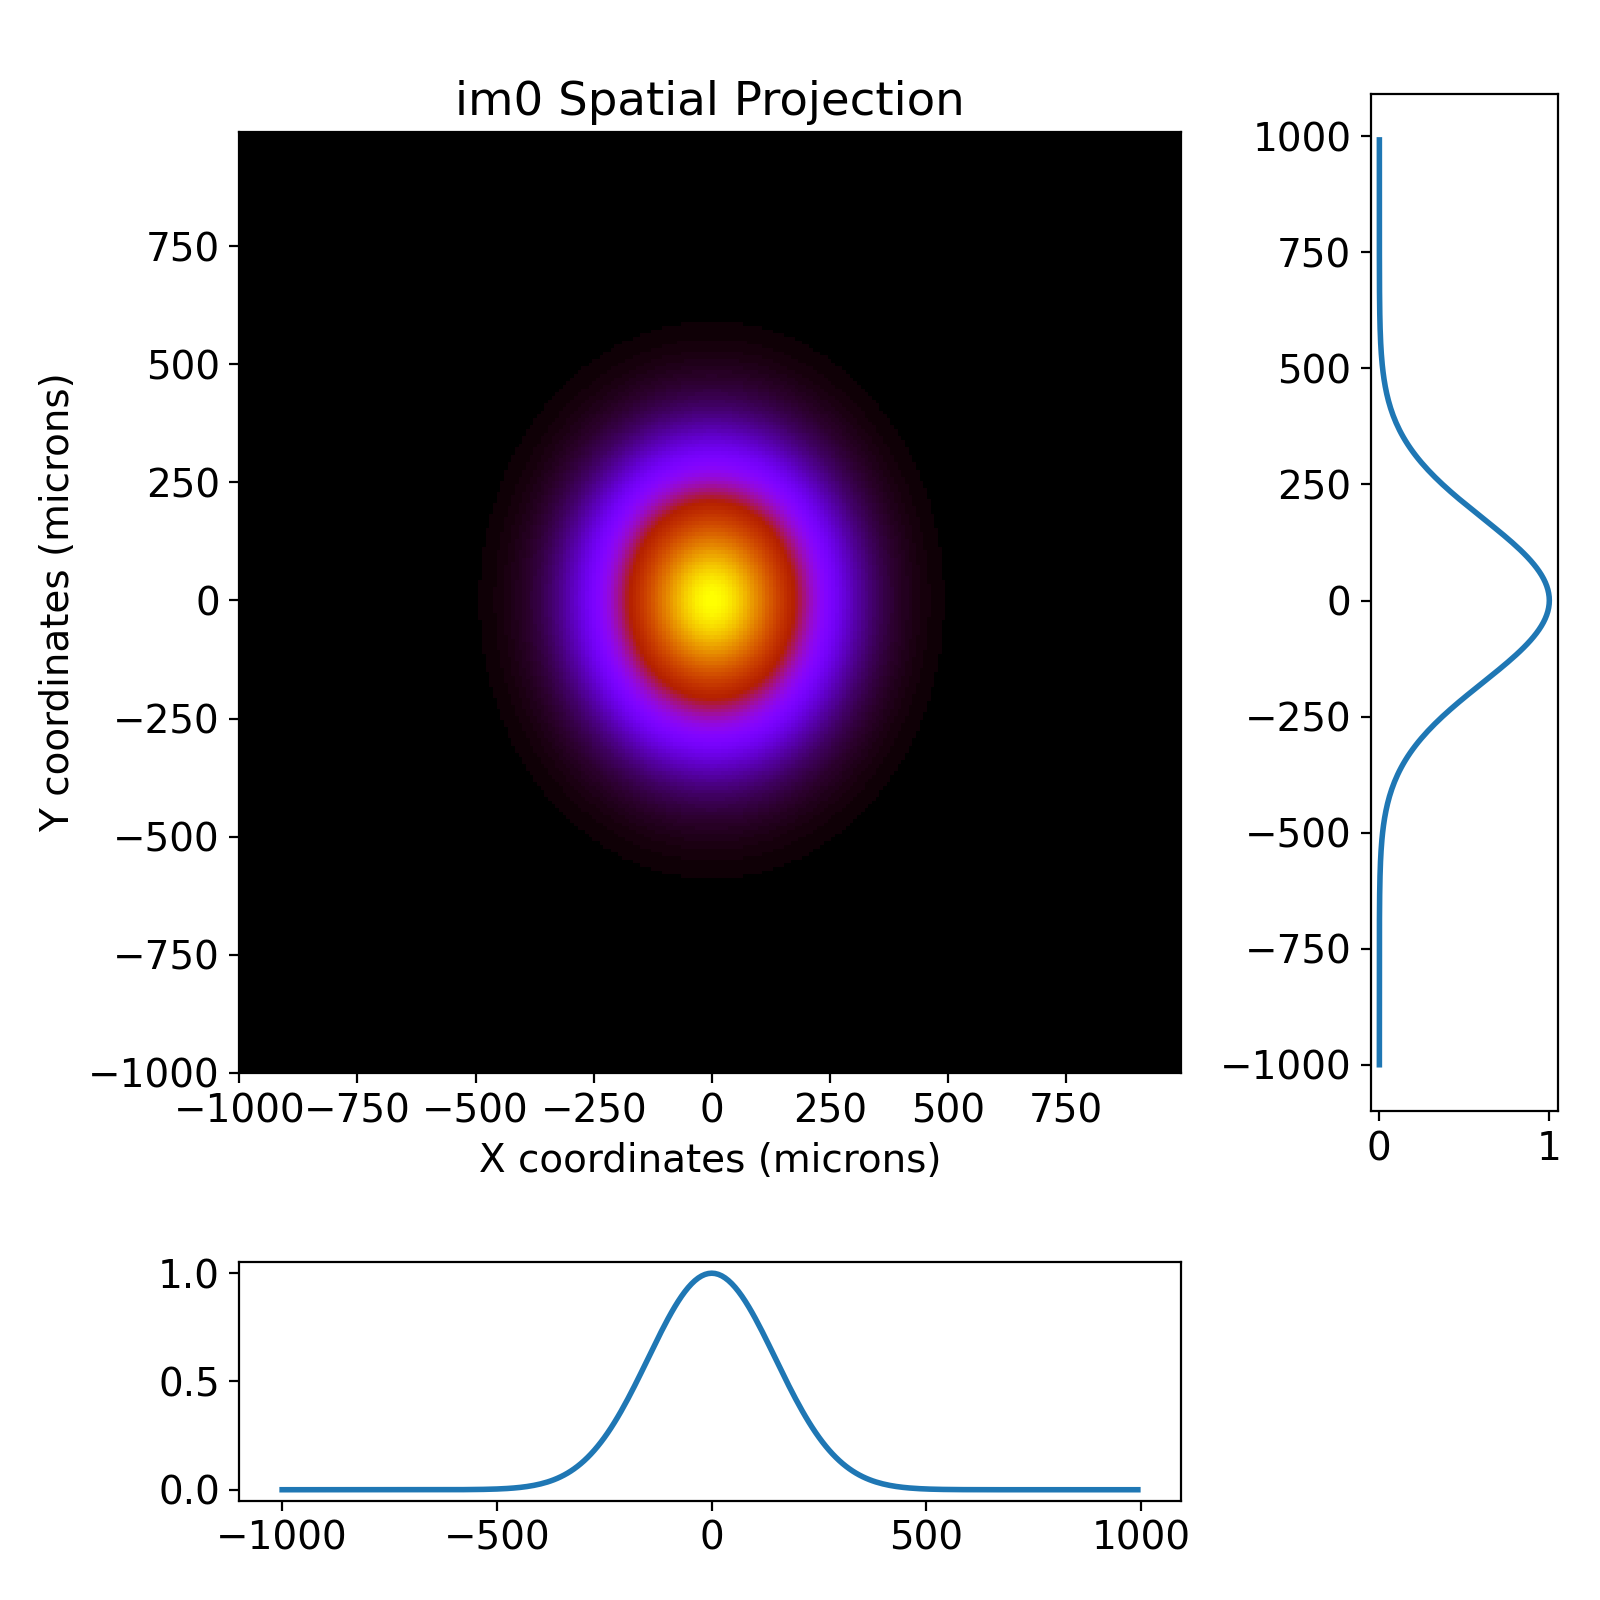

(<matplotlib.axes._subplots.AxesSubplot at 0x127ae3da0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x127279eb8>)

In [40]:
fig_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/Tunable Mono/figures/'

# plot input pulse at beam center
pulse.plot_pulse('im0')
# plt.savefig(fig_path+'input_pulse_slit.png')
# plot input spectrum at beam center
pulse.plot_spectrum('im0')
# plt.savefig(fig_path+'input_spectrum_slit.png')
# plot input beam spatial projection
pulse.imshow_projection('im0')
# plt.savefig(fig_path+'input_spatial_slit.png')

### Visualize focus properties

<IPython.core.display.Javascript object>


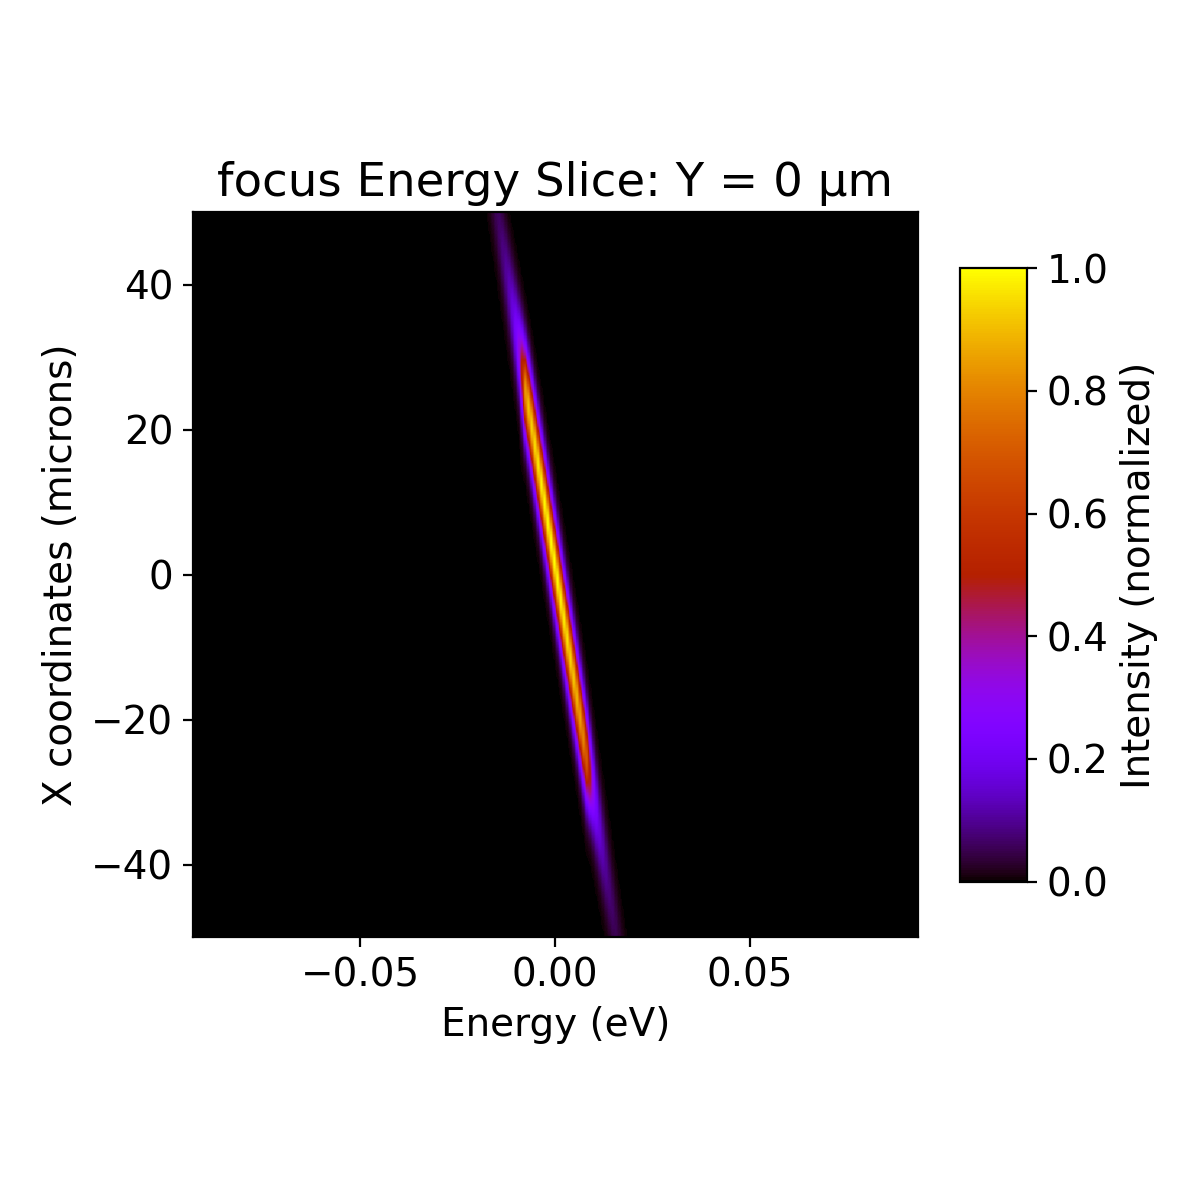

<IPython.core.display.Javascript object>


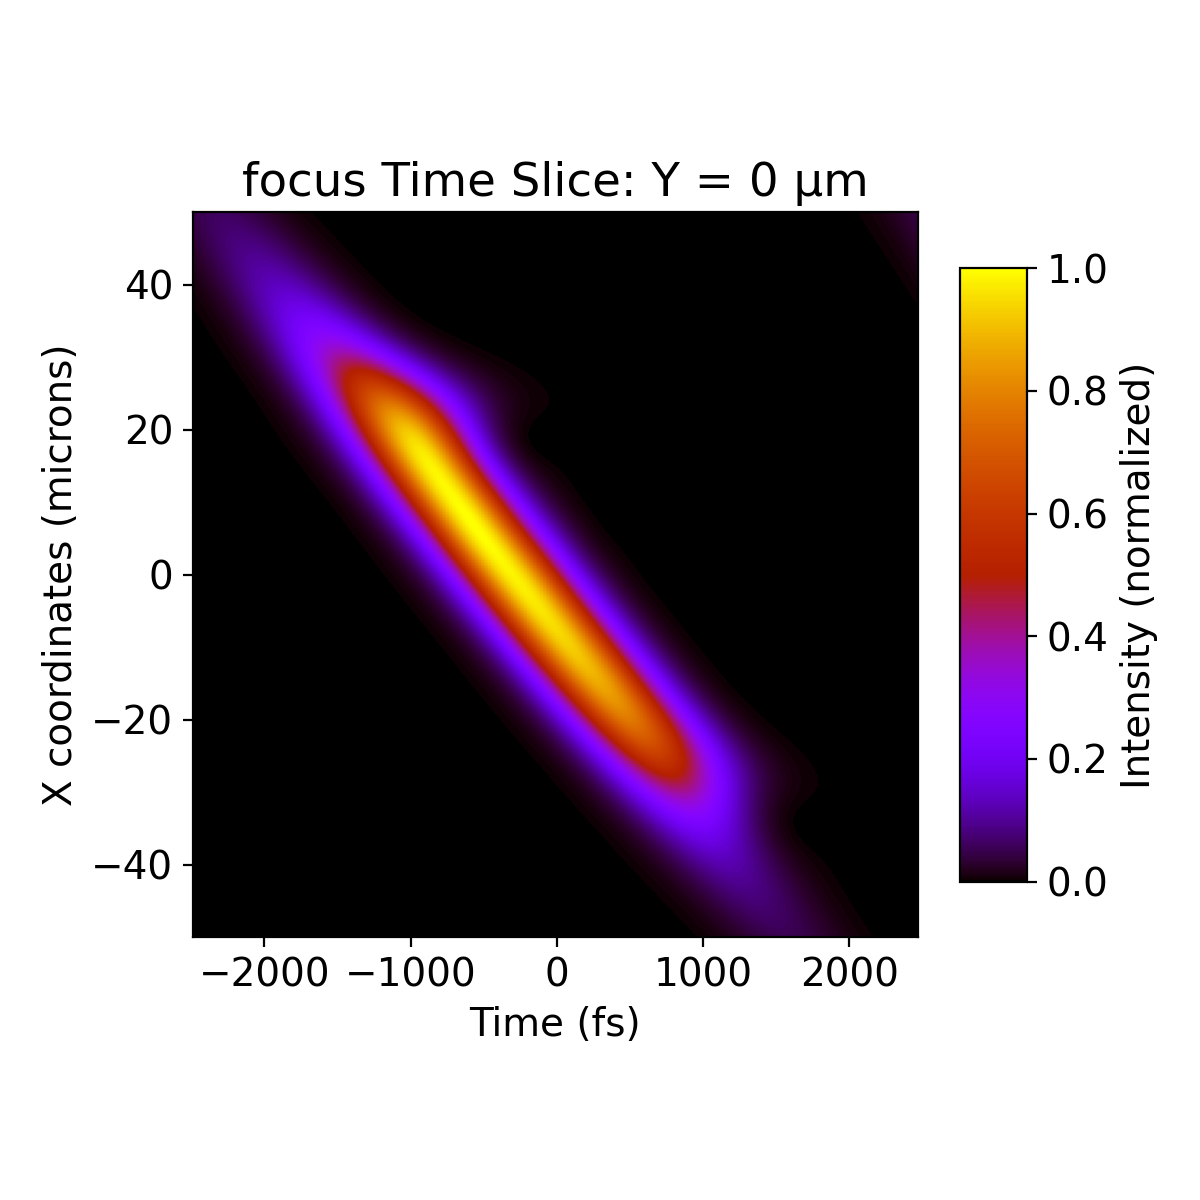

<IPython.core.display.Javascript object>


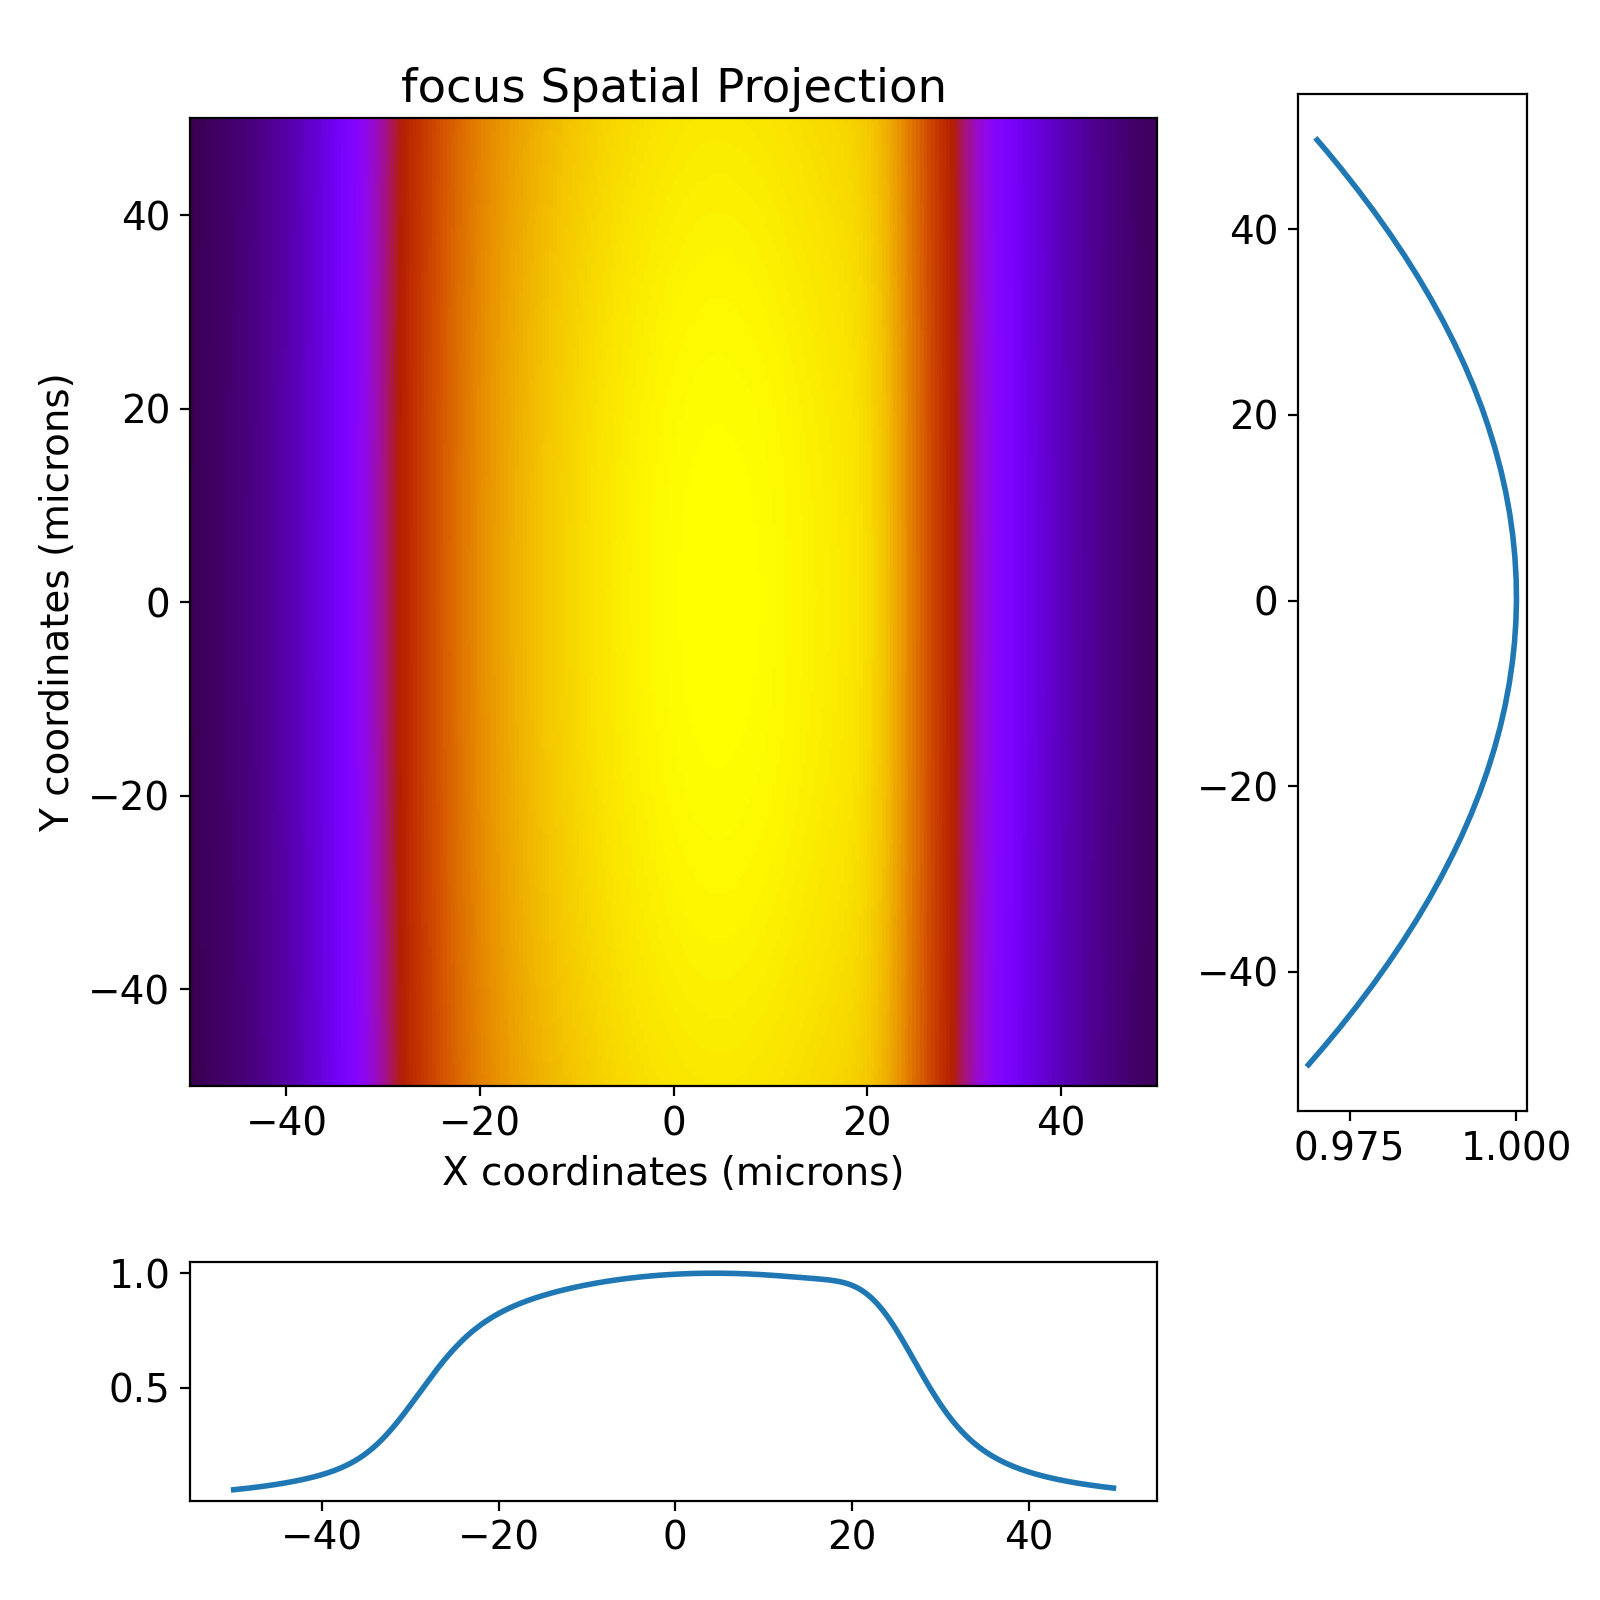

(<matplotlib.axes._subplots.AxesSubplot at 0x126b63588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x126395e10>)

In [17]:
# plot energy slice of focus
pulse.imshow_energy_slice('focus')
# plt.savefig(fig_path+'option1_focus_energy.png')
# plot time slice of focus
pulse.imshow_time_slice('focus', shift=-1000)
# plt.savefig(fig_path+'option1_focus_time.png')
# show spatial projection
pulse.imshow_projection('focus')
# plt.savefig(fig_path+'option1_focus_spatial.png')

### Visualize output

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1826: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


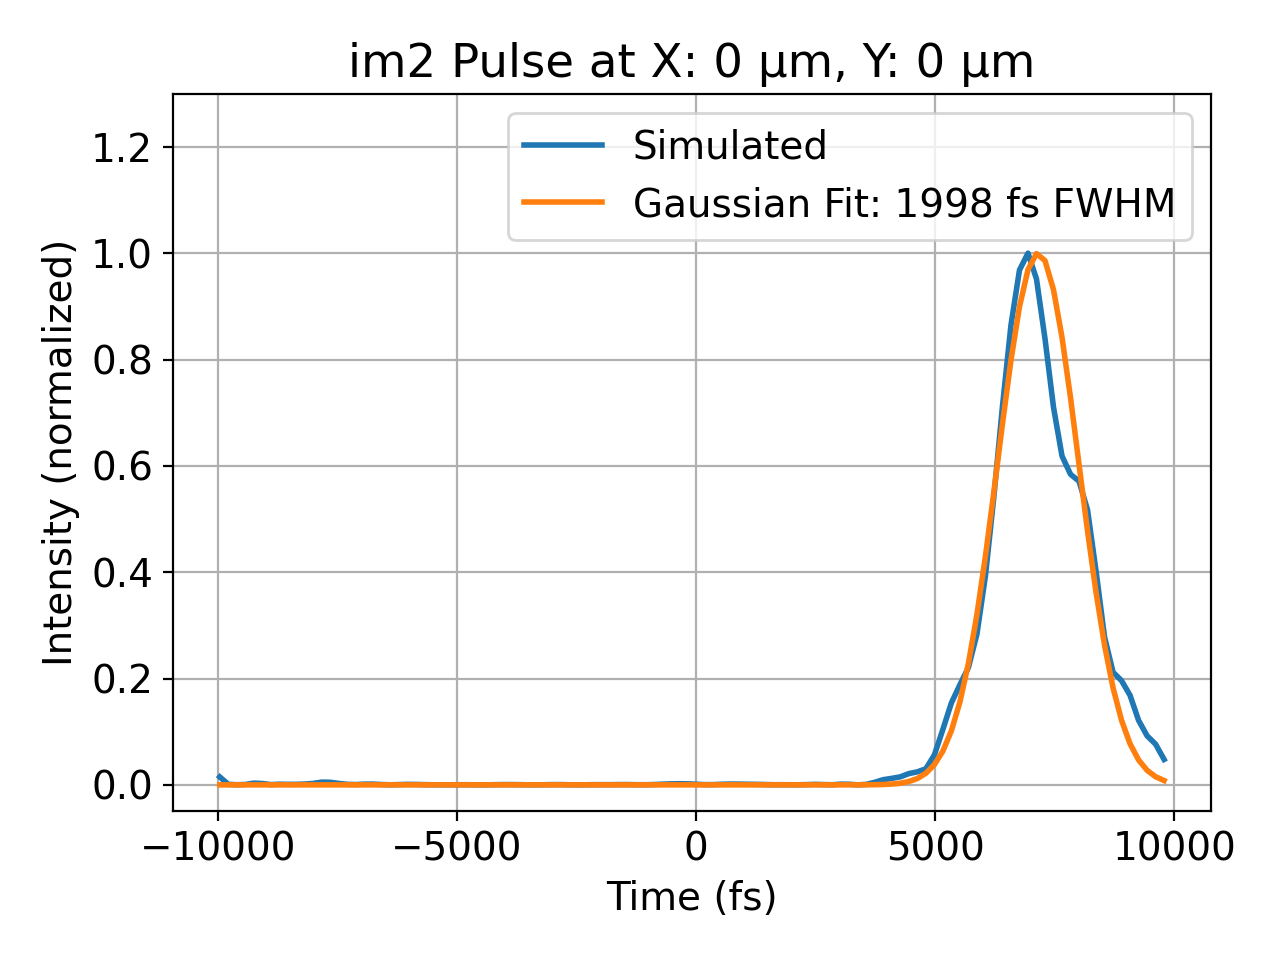

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1454: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


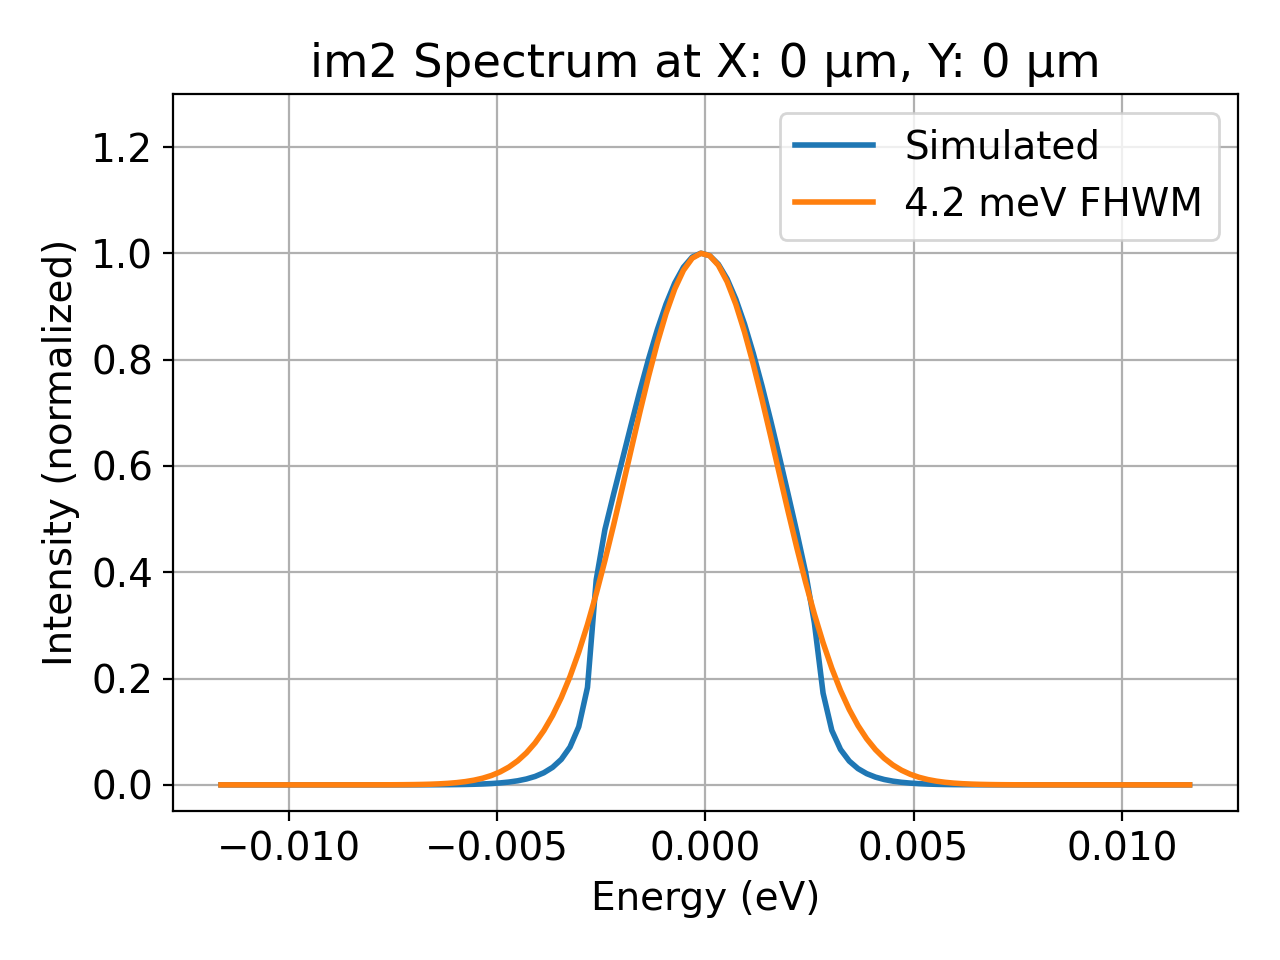

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


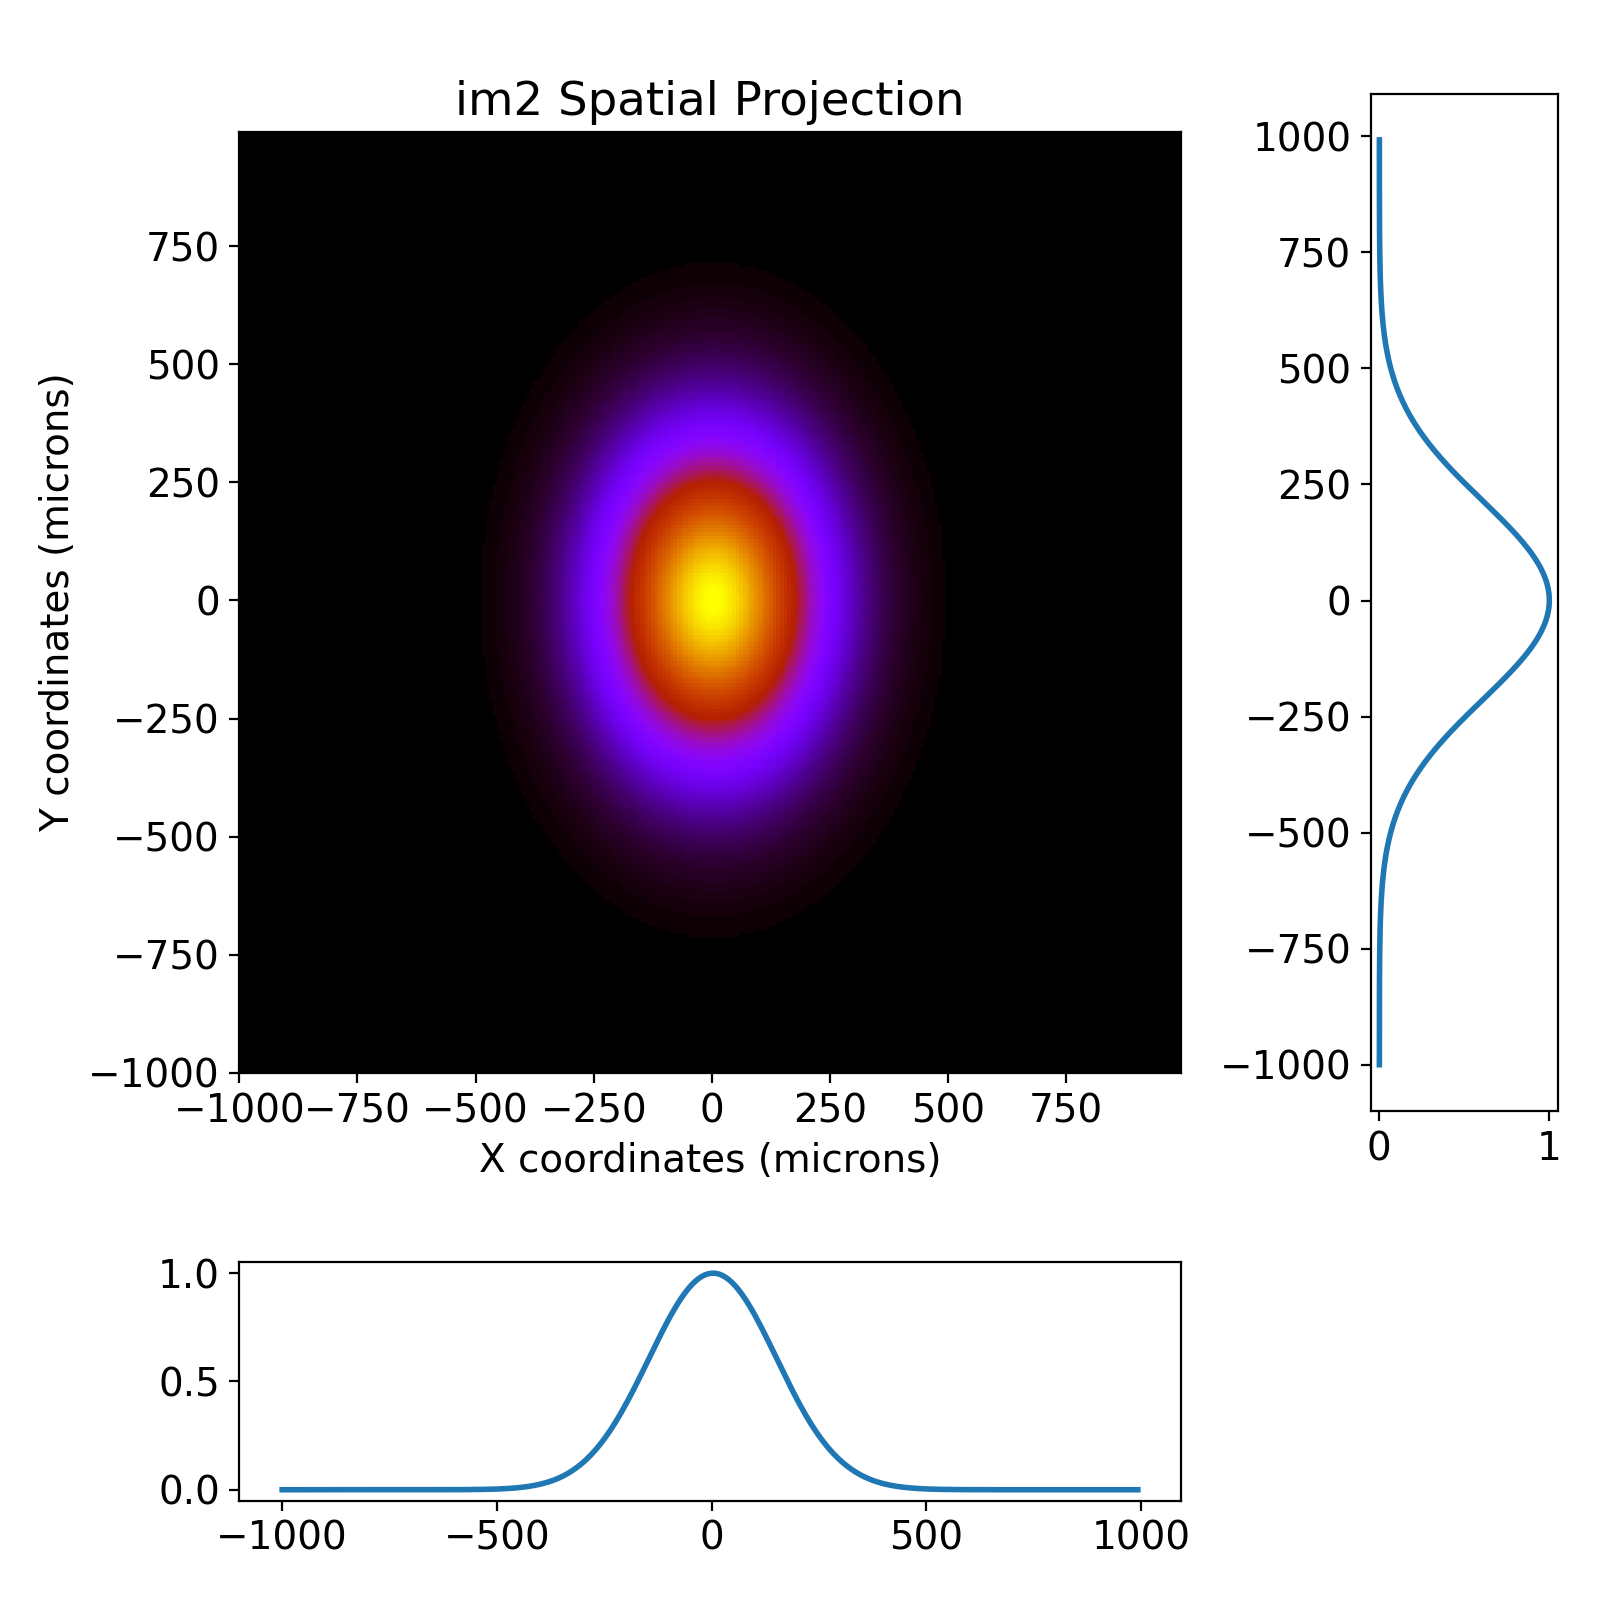

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1281: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6))


<IPython.core.display.Javascript object>


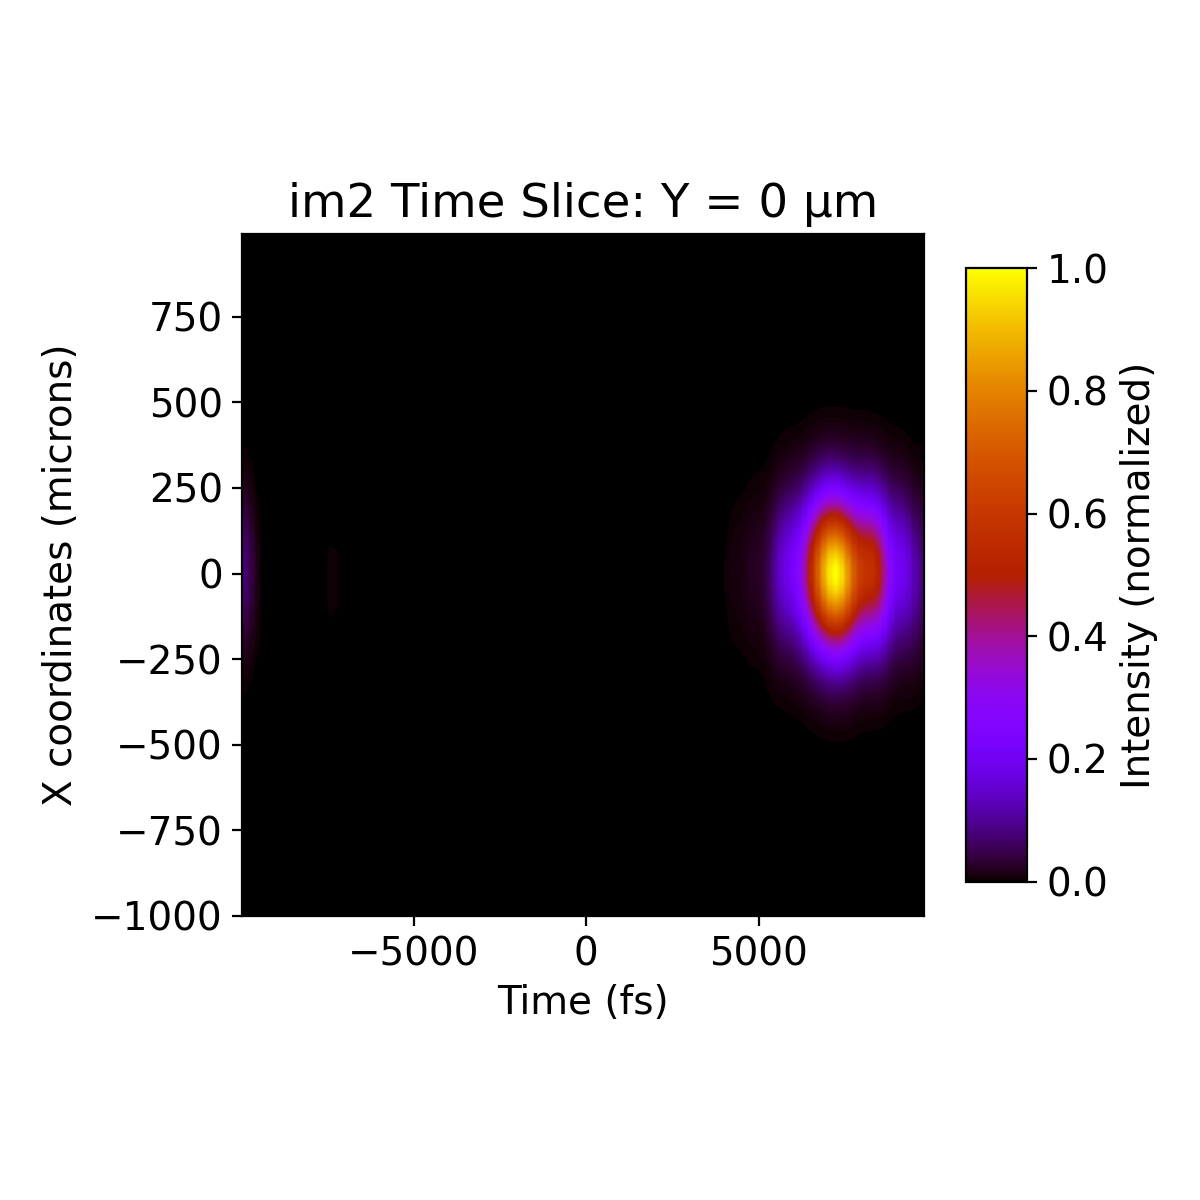

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1189: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


<IPython.core.display.Javascript object>


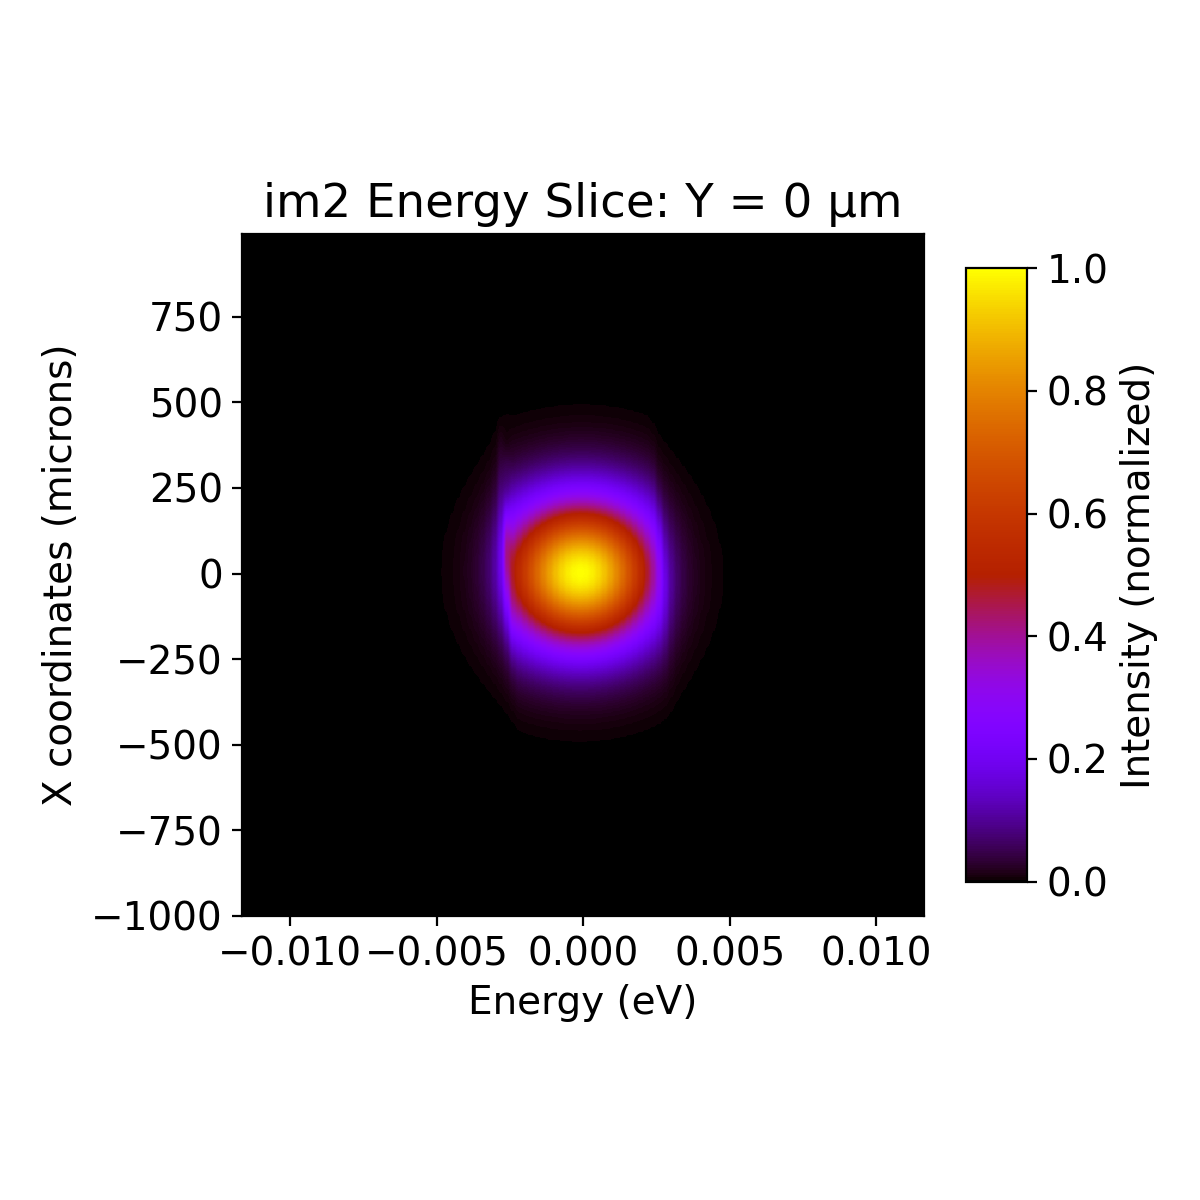

<IPython.core.display.Javascript object>


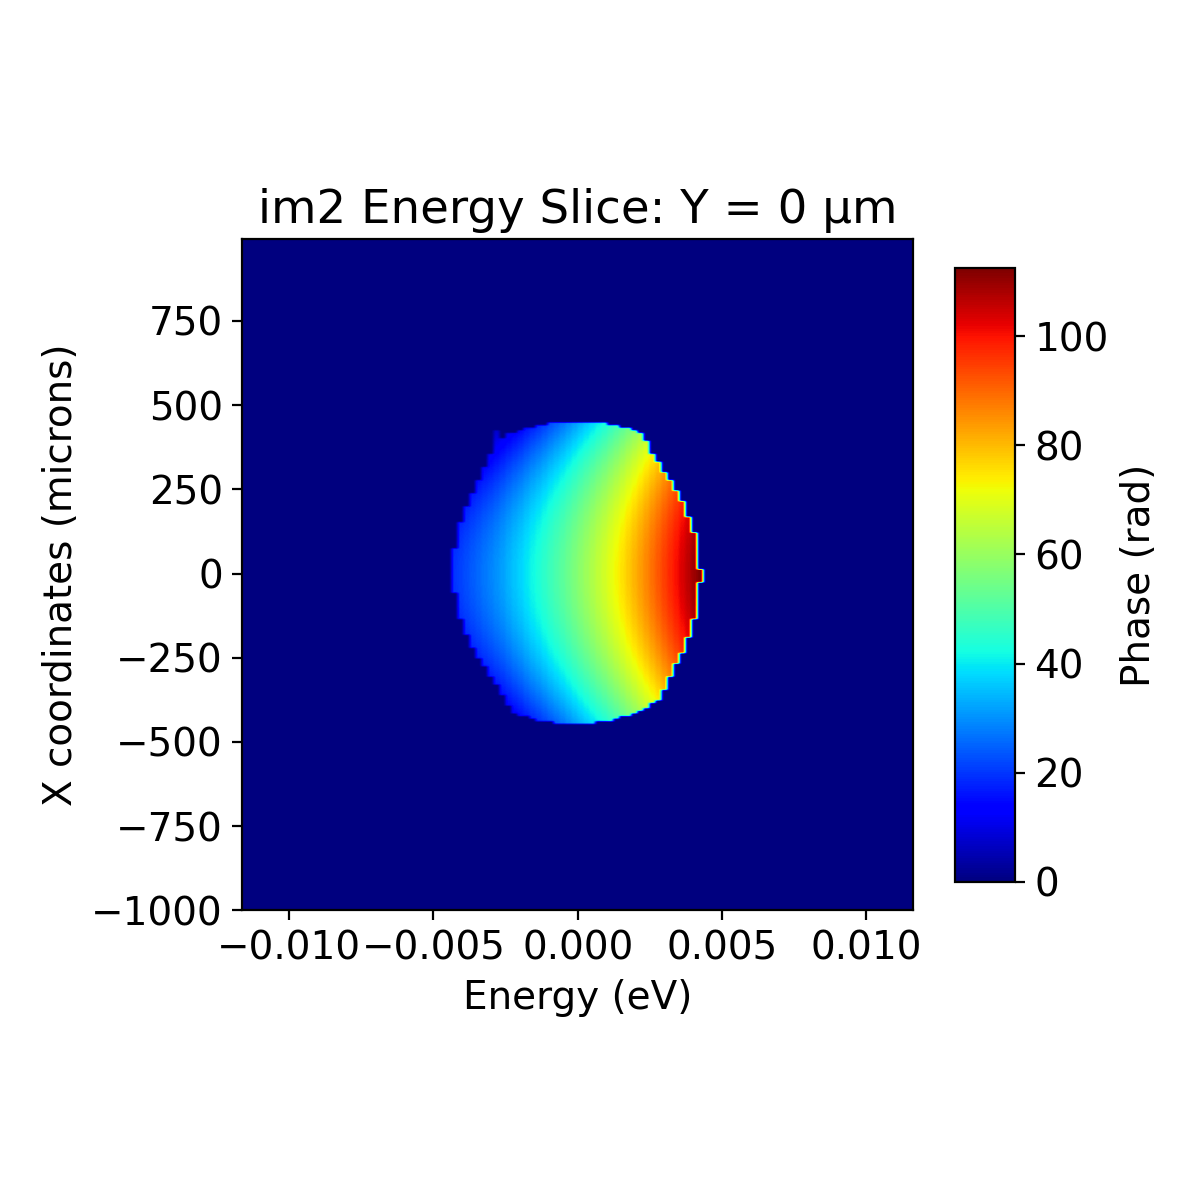

0.0
0.004197288806095138
0.8831084655291107
17794.999932303082
0.7485351129926735


In [39]:
# plot output pulse at beam center
pulse.plot_pulse('im2', shift=0)
# plt.savefig(fig_path+'option1_output_pulse.png')
# plot output spectraum at beam center
pulse.plot_spectrum('im2')
# plt.savefig(fig_path+'option1_output_spectrum.png')
# show spatial projection of output
pulse.imshow_projection('im2')
# plt.savefig(fig_path+'option1_output_spatial.png')
# show time slice of output
pulse.imshow_time_slice('im2', shift=400)
# plt.savefig(fig_path+'option1_output_time.png')
# show energy slice of output
pulse.imshow_energy_slice('im2')
# plt.savefig(fig_path+'option1_output_energy.png')
# show spectral phase slice of output
pulse.imshow_energy_slice('im2', image_type='phase')

print(pulse.pulsefront_tilt('im2'))
print(pulse.pulse_bandwidth('im2'))
print(pulse.throughput('im0','im2'))
print(pulse.central_energy('im2'))

print(pulse.pulse_bandwidth('im2')/pulse.pulse_bandwidth('im0')*.95**4)

# No slit

In [95]:
# list of devices to propagate through
devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]
# devices = [im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]

# initialize beamline
mono_beamline = beamline.Beamline(devices)


after c1: 1.1511
after c2: -0.0002
after c3: -1.1513
after c4: -0.0002


## Time-domain propagation

In [96]:
# reset central photon energy
beam_params['photonEnergy'] = 17795

# initialize pulse. tau sets transform-limited pulse duration in fs (FWHM). Time window is in fs.
pulse = beam.Pulse(beam_params=beam_params, tau=100, time_window=5000)

print('Number of spectral components: {:d}'.format(pulse.N))

Number of spectral components: 112


In [97]:
%%capture cap
# propagate pulse through beamline. This will take a minute or so (depends on number of spectral 
# components which is proportional to the ratio time_window/tau).
pulse.propagate(beamline=mono_beamline, screen_names=['im0','focus','im2'])

### Visualize input

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1826: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


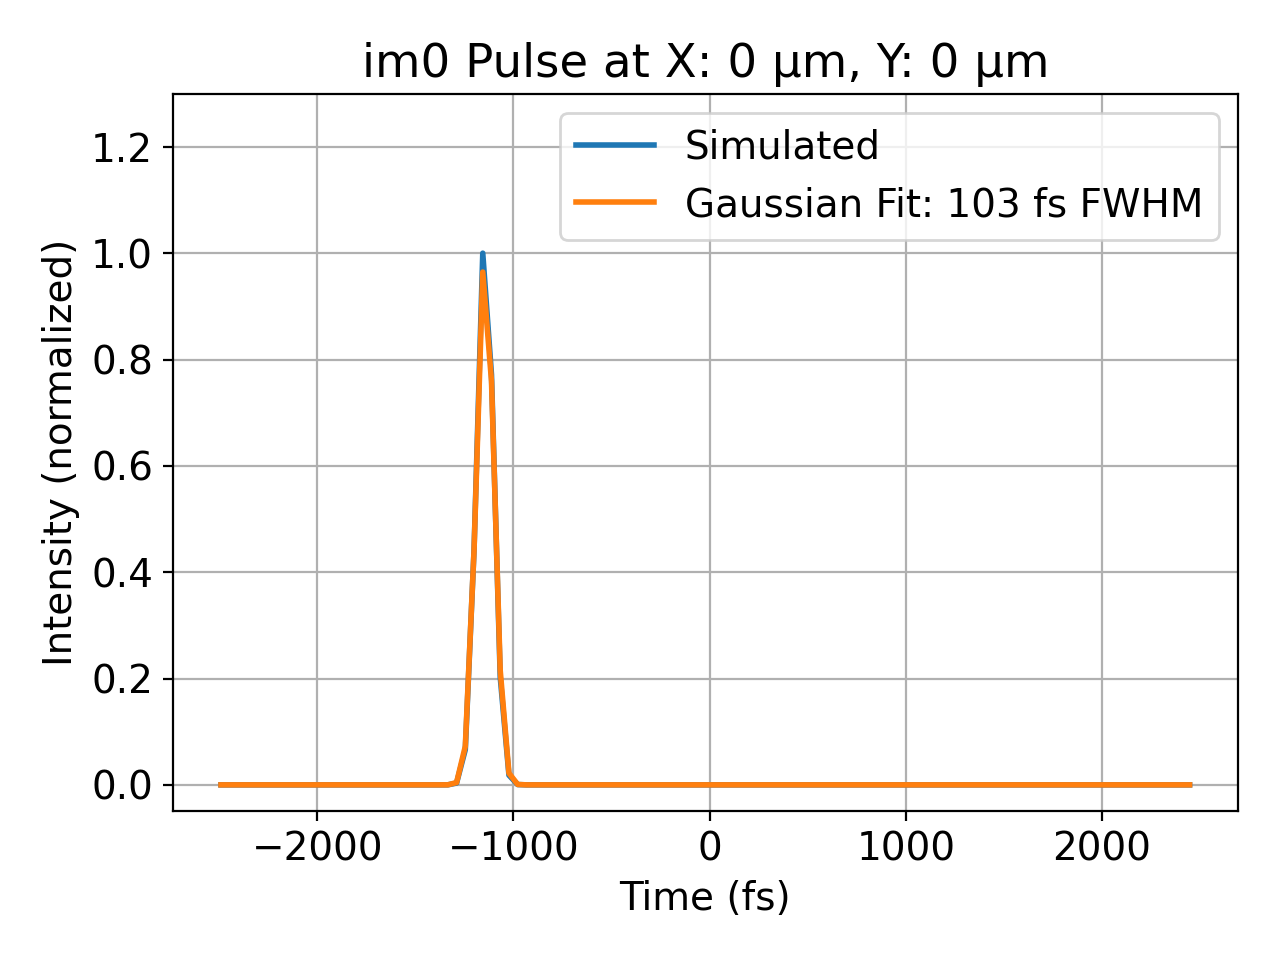

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1454: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


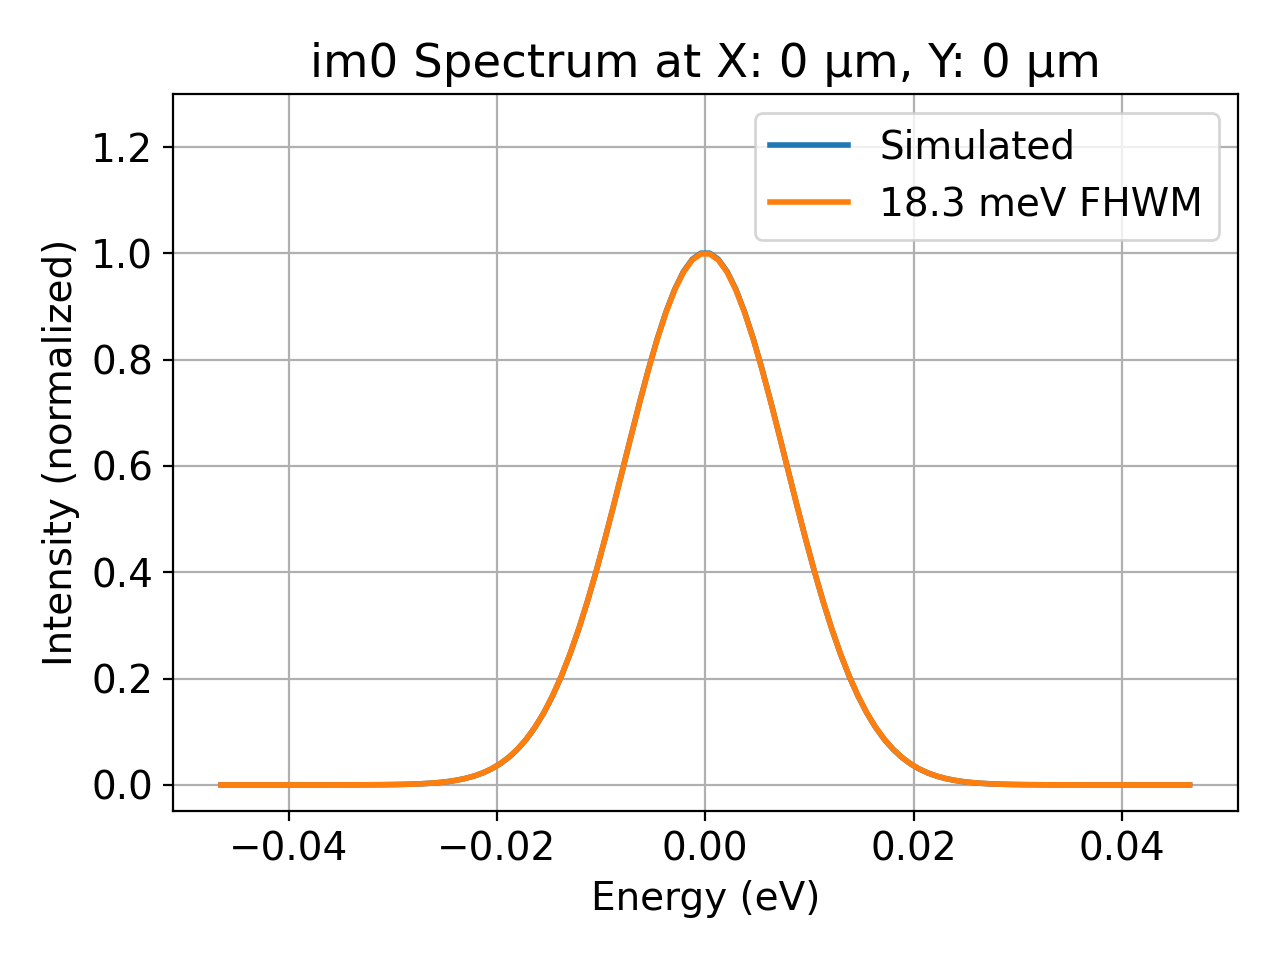

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


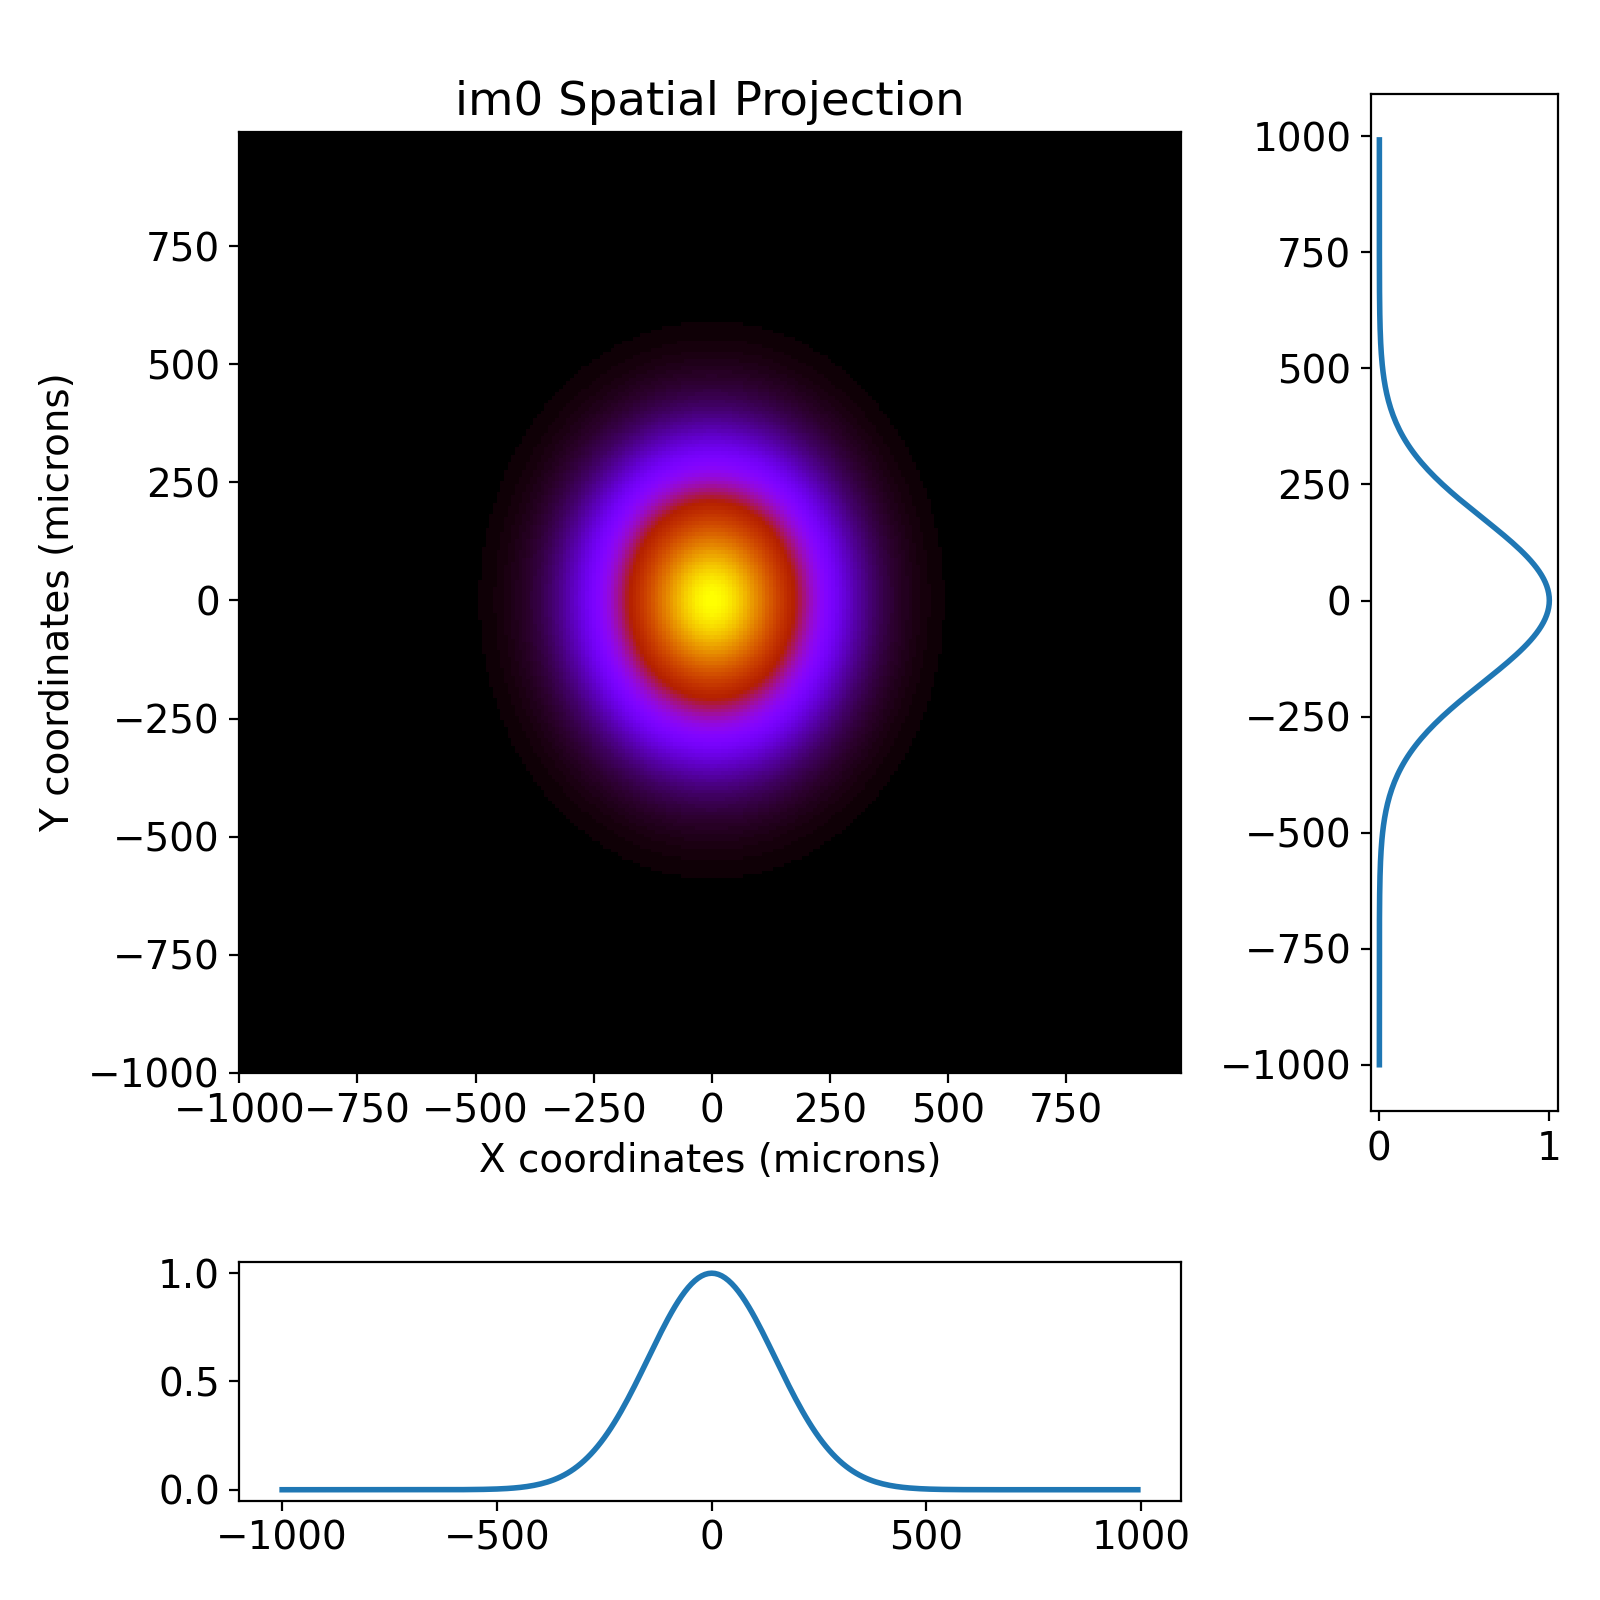

(<matplotlib.axes._subplots.AxesSubplot at 0x12687a438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12721acc0>)

In [98]:
fig_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/Tunable Mono/figures/'

# plot input pulse at beam center
pulse.plot_pulse('im0')
# plt.savefig(fig_path+'input_pulse_no_slit.png')
# plot input spectrum at beam center
pulse.plot_spectrum('im0')
# plt.savefig(fig_path+'input_spectrum_no_slit.png')
# plot input beam spatial projection
pulse.imshow_projection('im0')
# plt.savefig(fig_path+'input_spatial_no_slit.png')

### Visualize focus properties

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1189: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


<IPython.core.display.Javascript object>


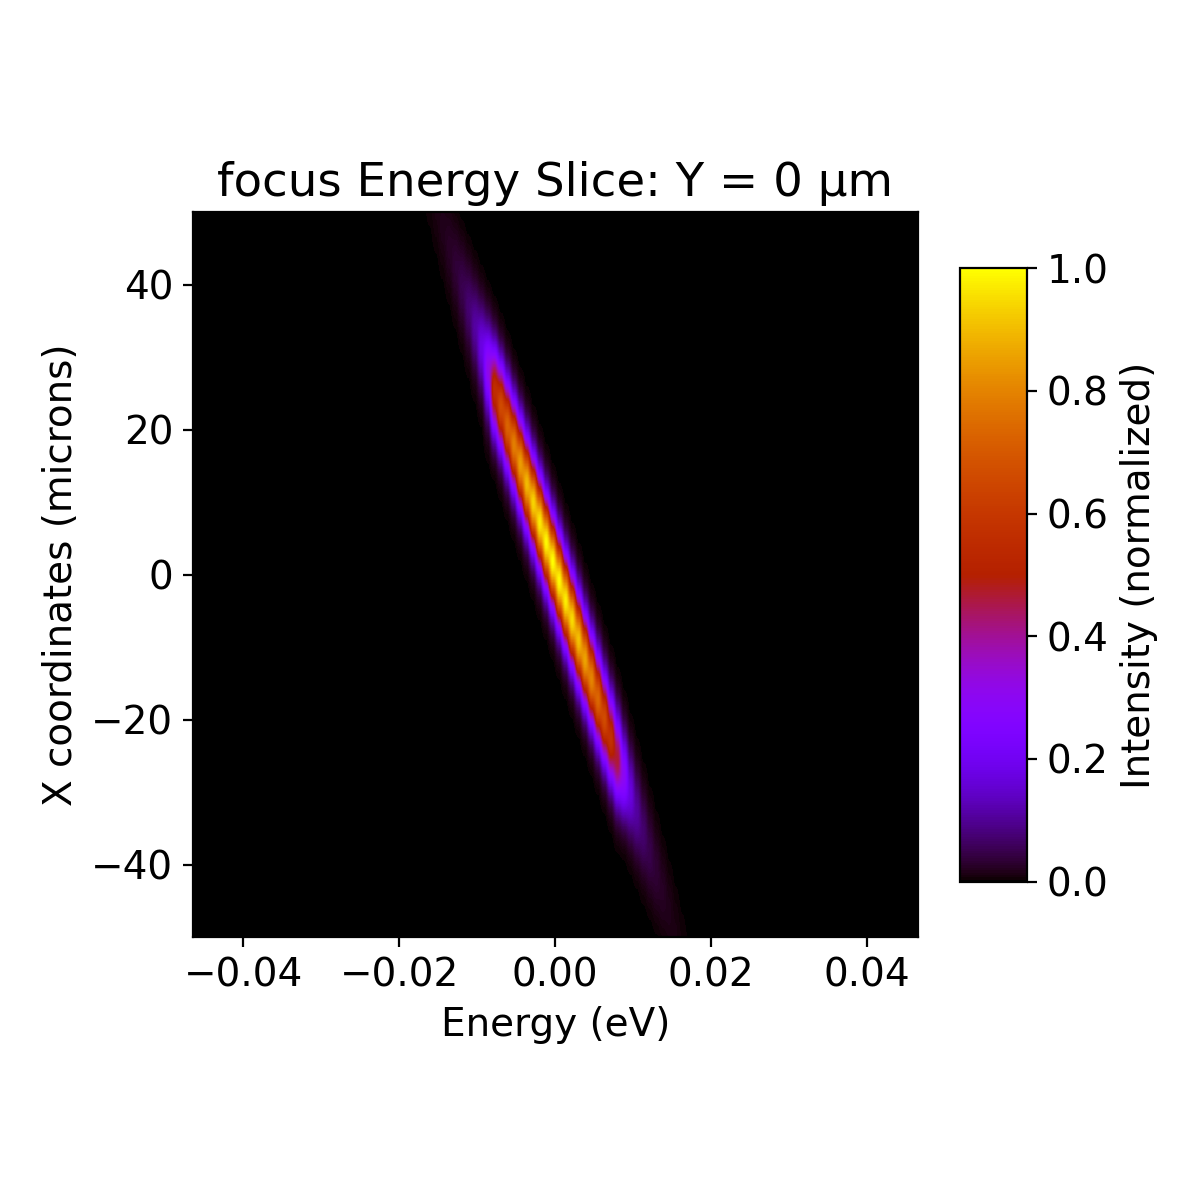

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1281: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6))


<IPython.core.display.Javascript object>


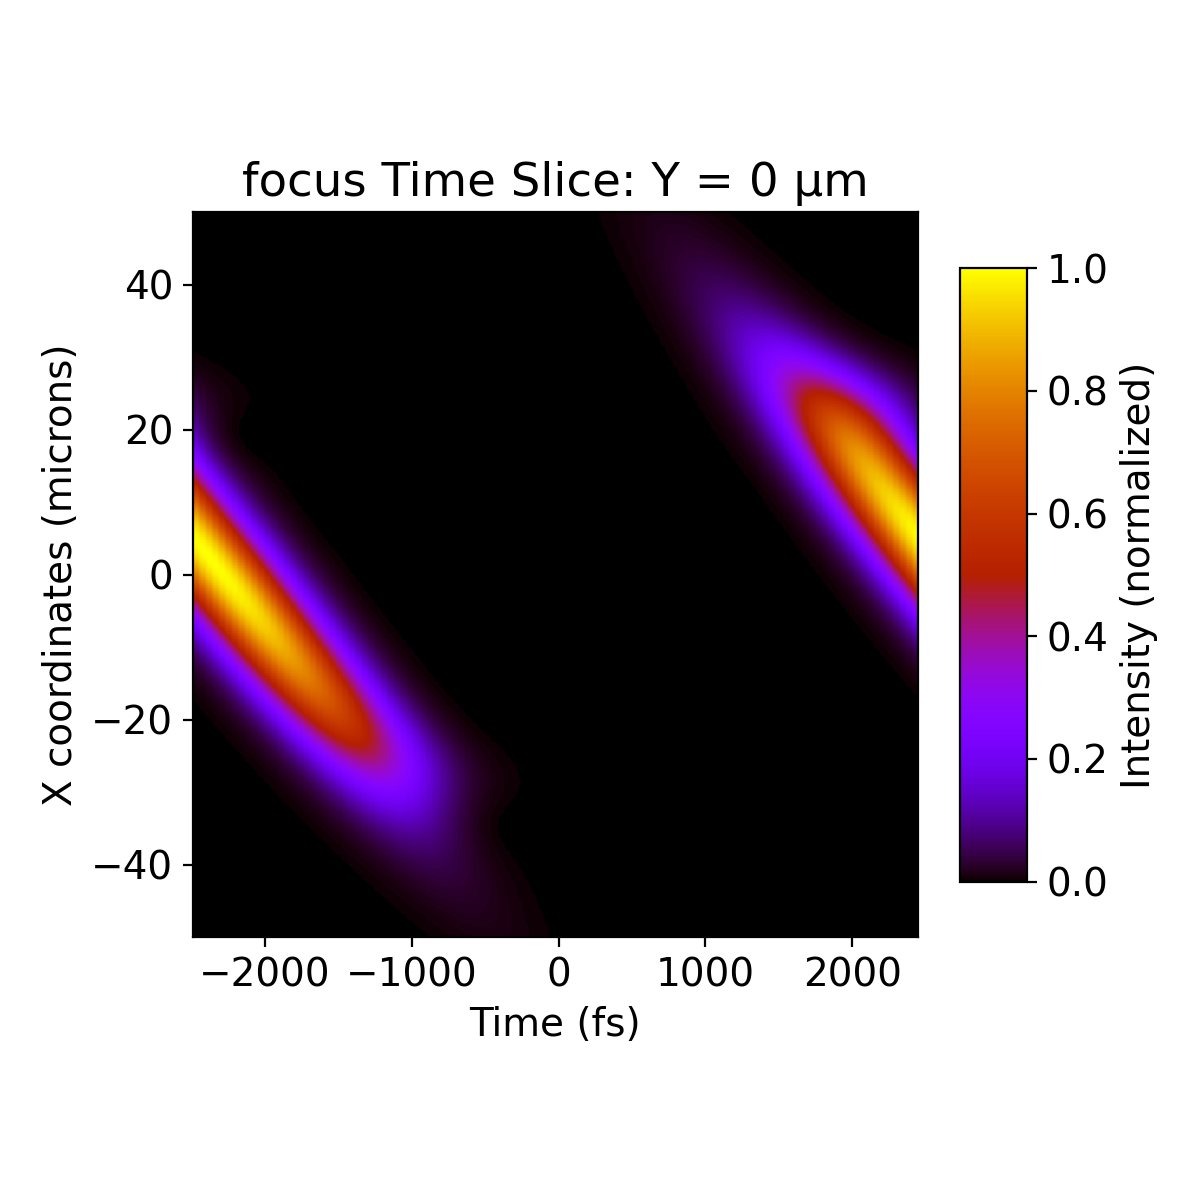

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


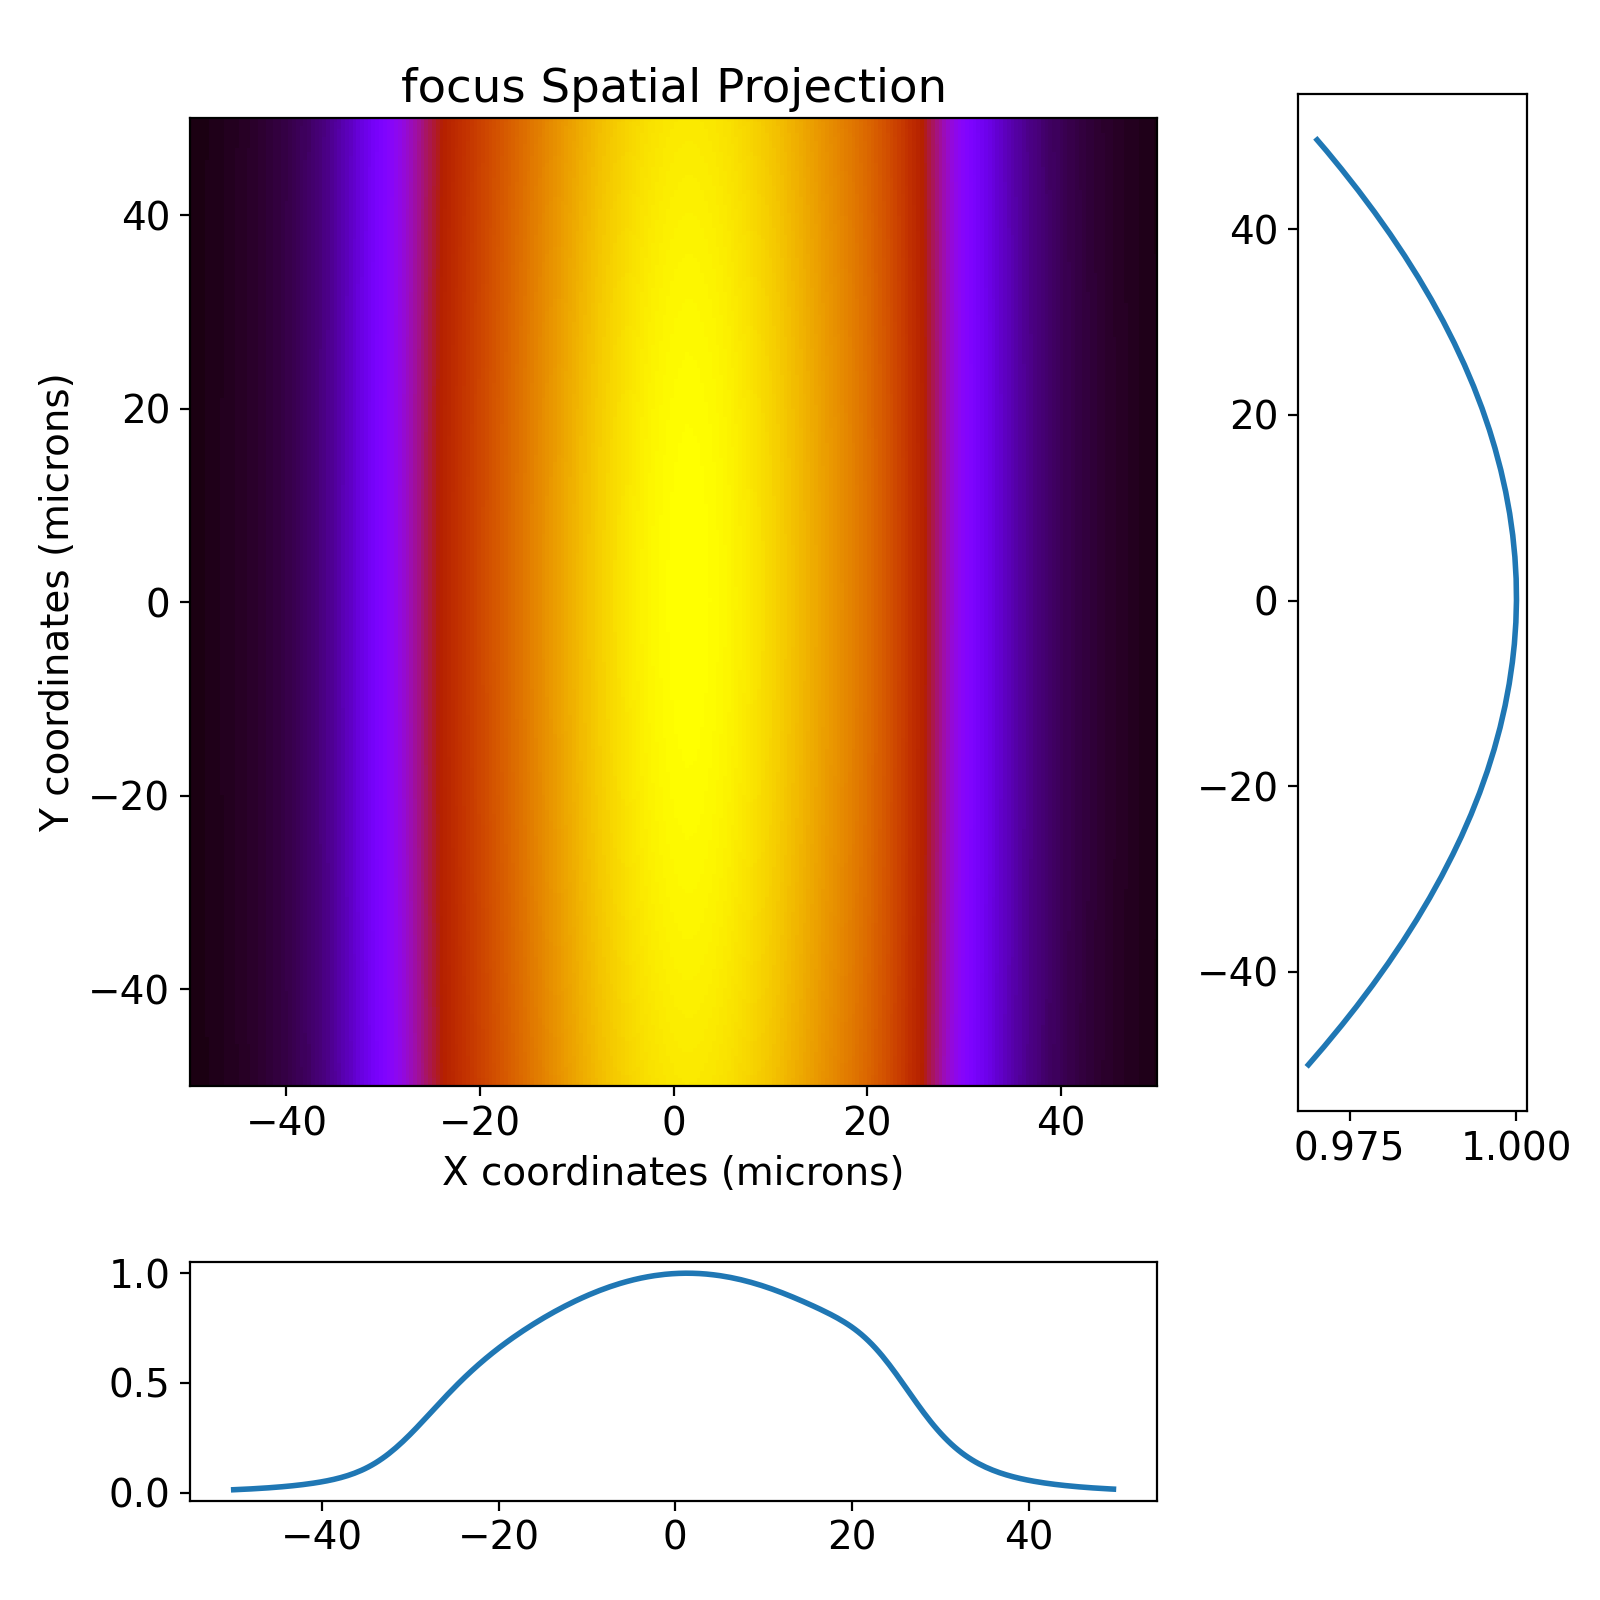

(<matplotlib.axes._subplots.AxesSubplot at 0x125700c88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1258cb2b0>)

In [99]:
# plot energy slice of focus
pulse.imshow_energy_slice('focus')
# plt.savefig(fig_path+'option1_focus_energy_no_slit.png')
# plot time slice of focus
pulse.imshow_time_slice('focus', shift=-1000)
# plt.savefig(fig_path+'option1_focus_time_no_slit.png')
# show spatial projection
pulse.imshow_projection('focus')
# plt.savefig(fig_path+'option1_focus_spatial_no_slit.png')

### Visualize output

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1826: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


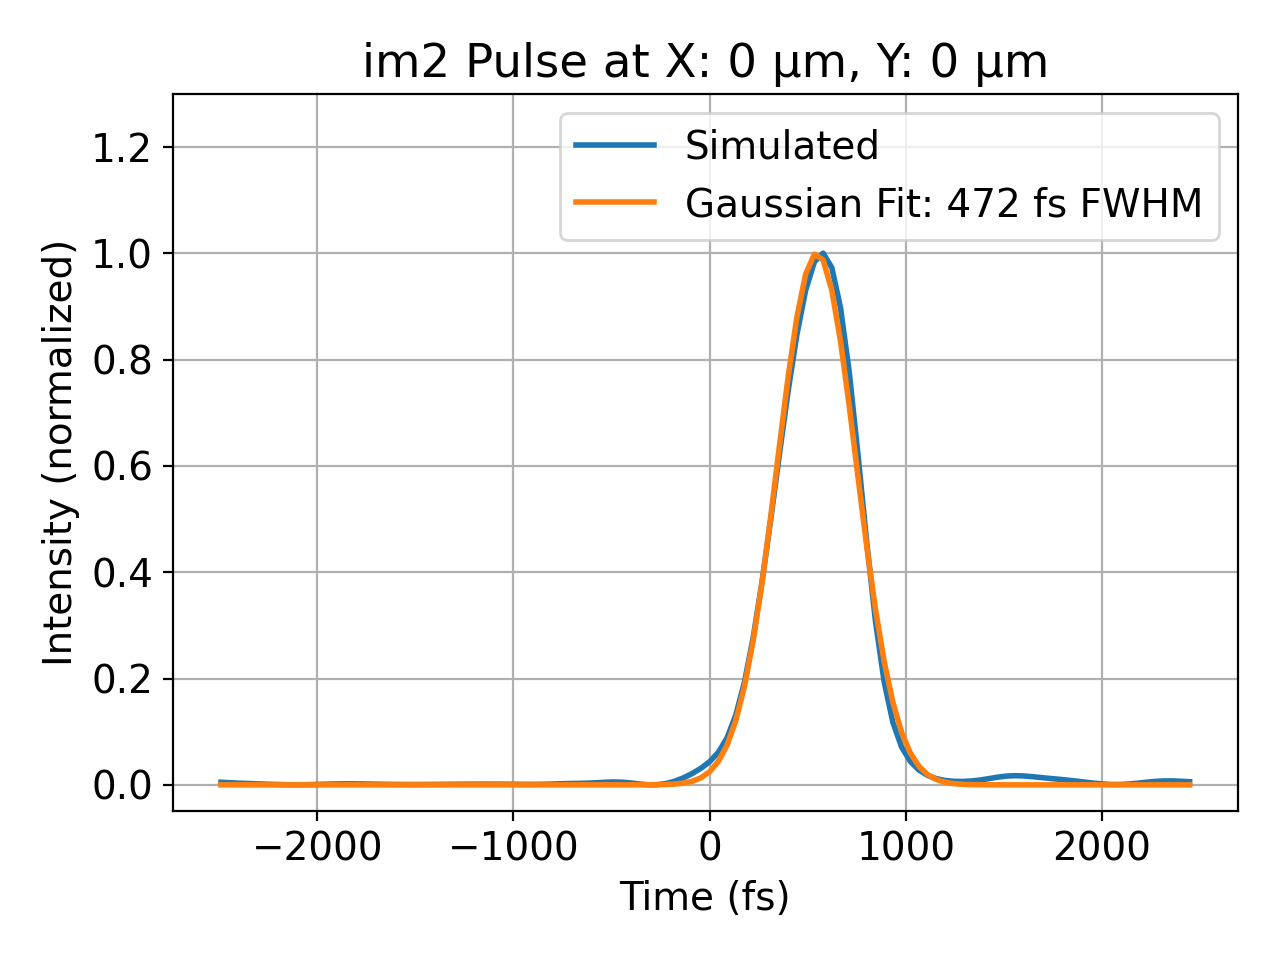

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1454: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


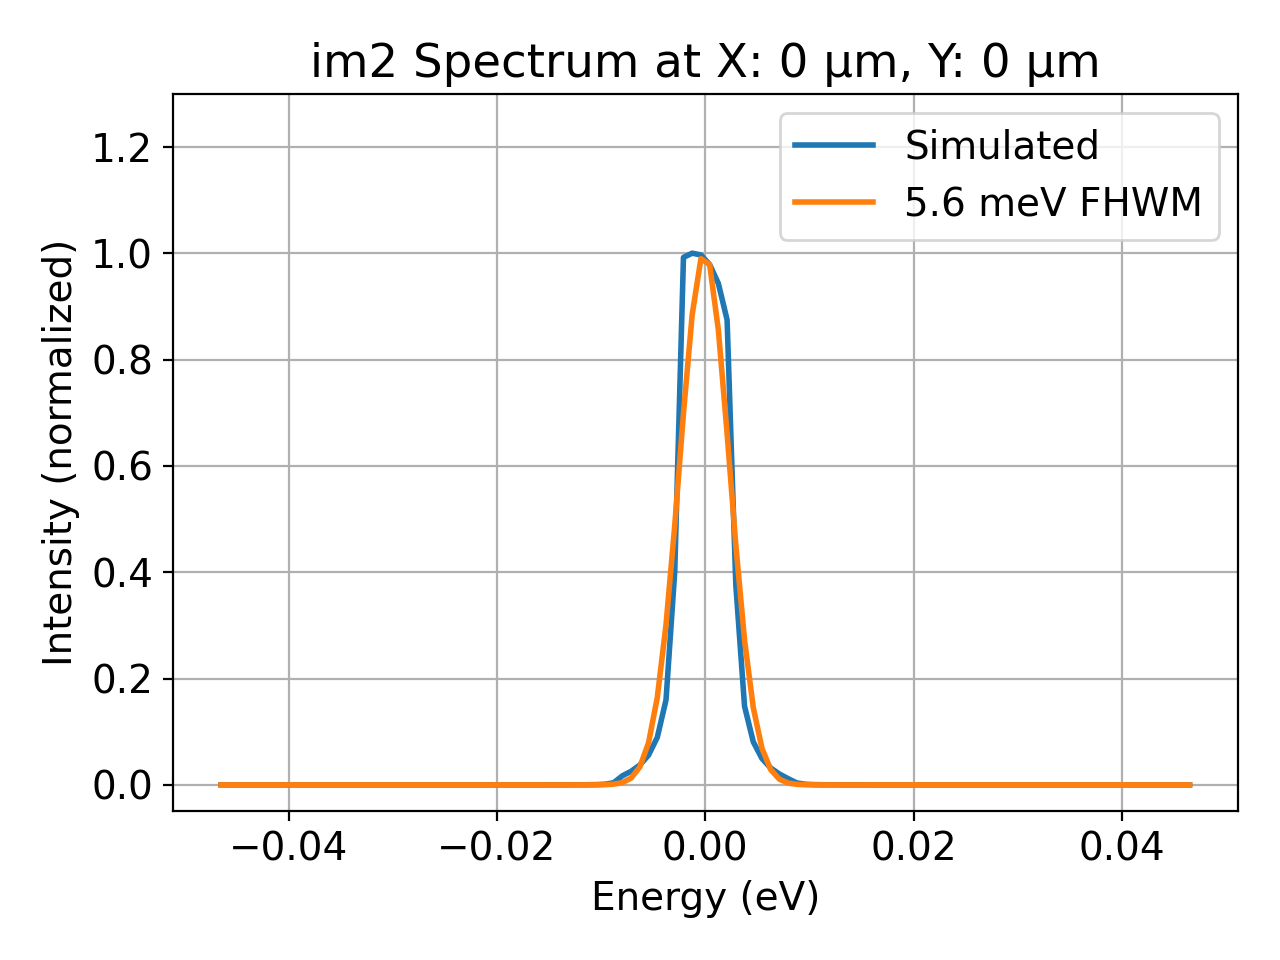

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


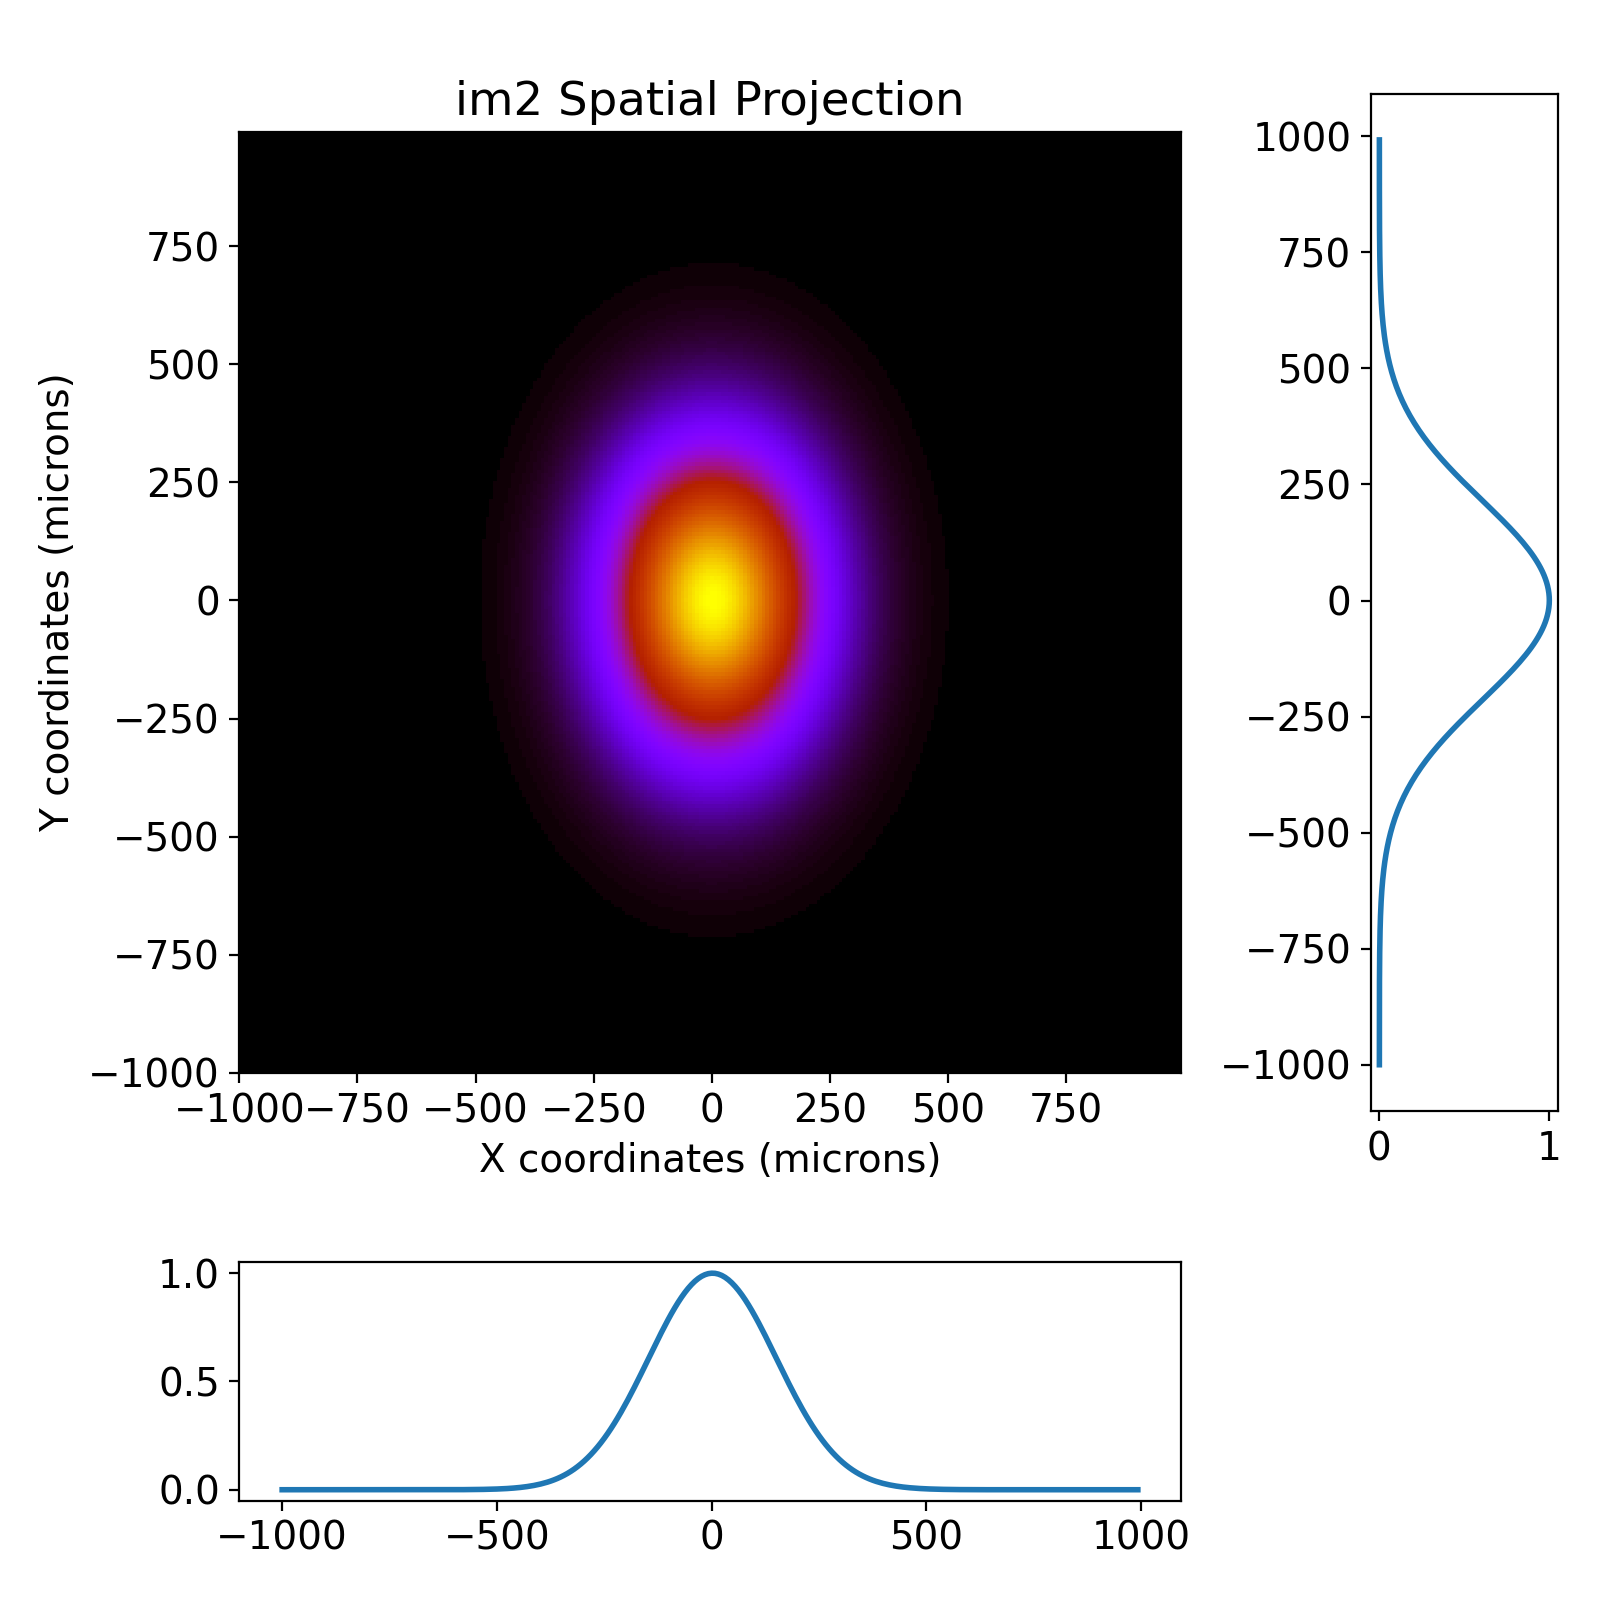

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1281: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 6))


<IPython.core.display.Javascript object>


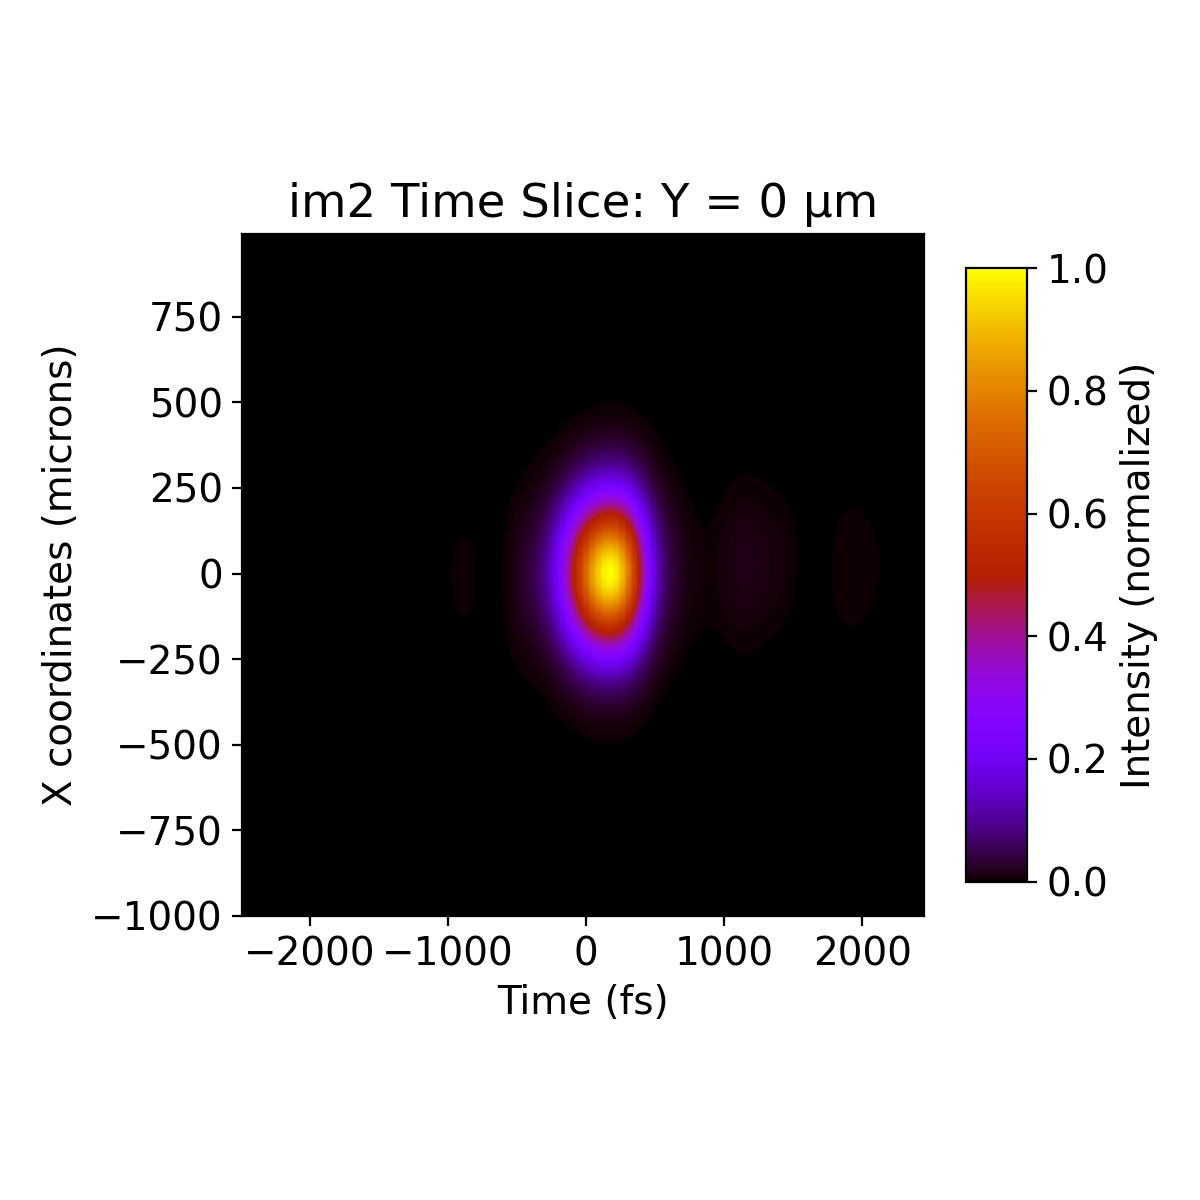

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/beam1d.py:1189: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,6))


<IPython.core.display.Javascript object>


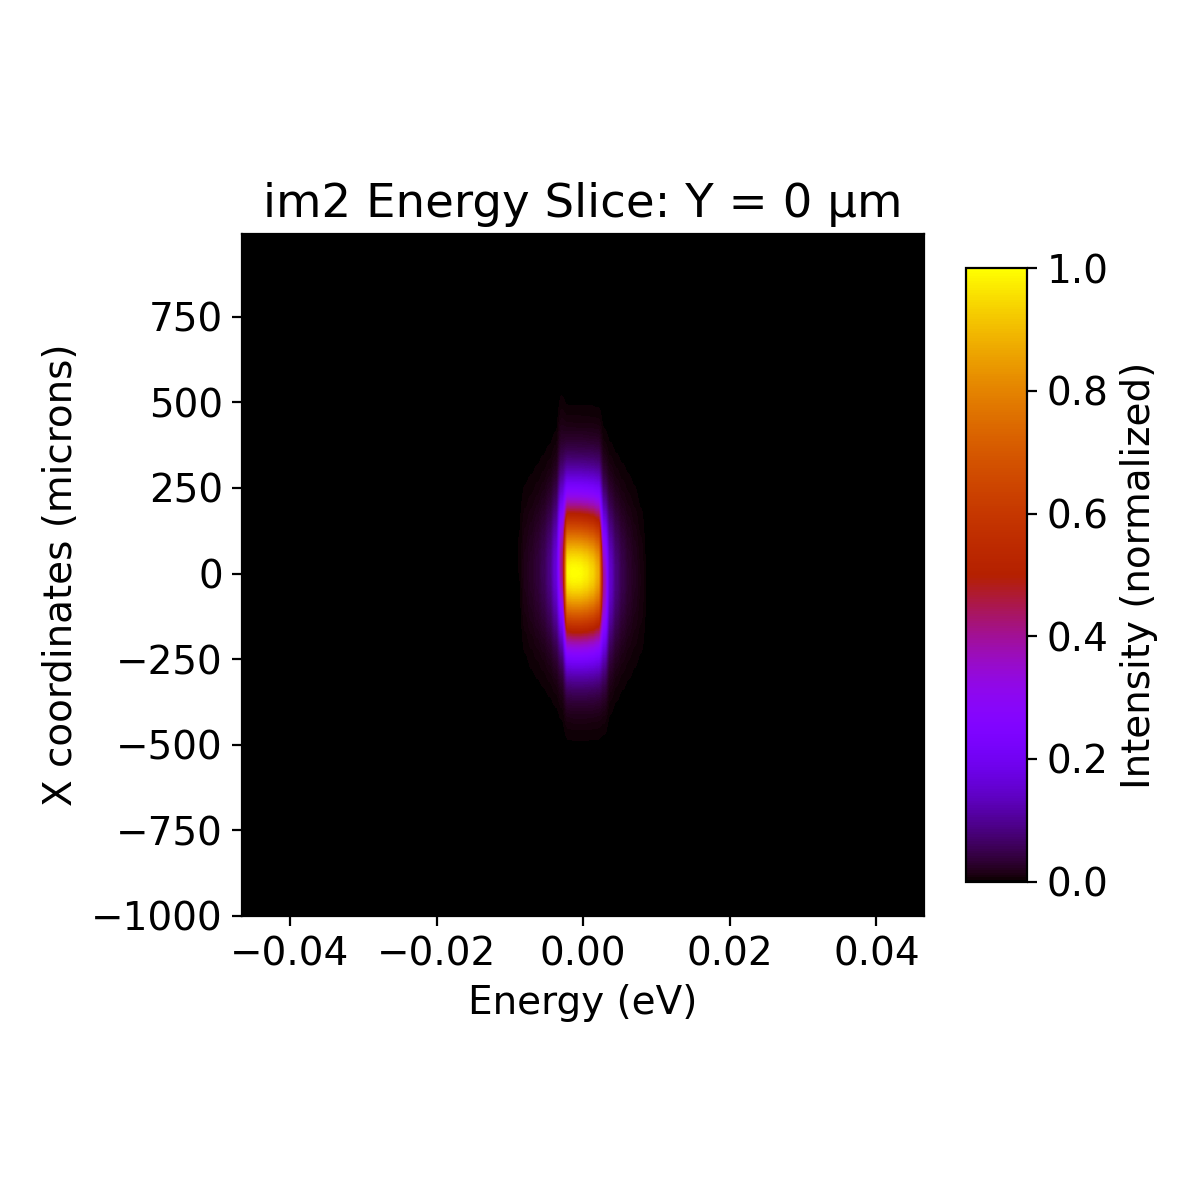

<IPython.core.display.Javascript object>


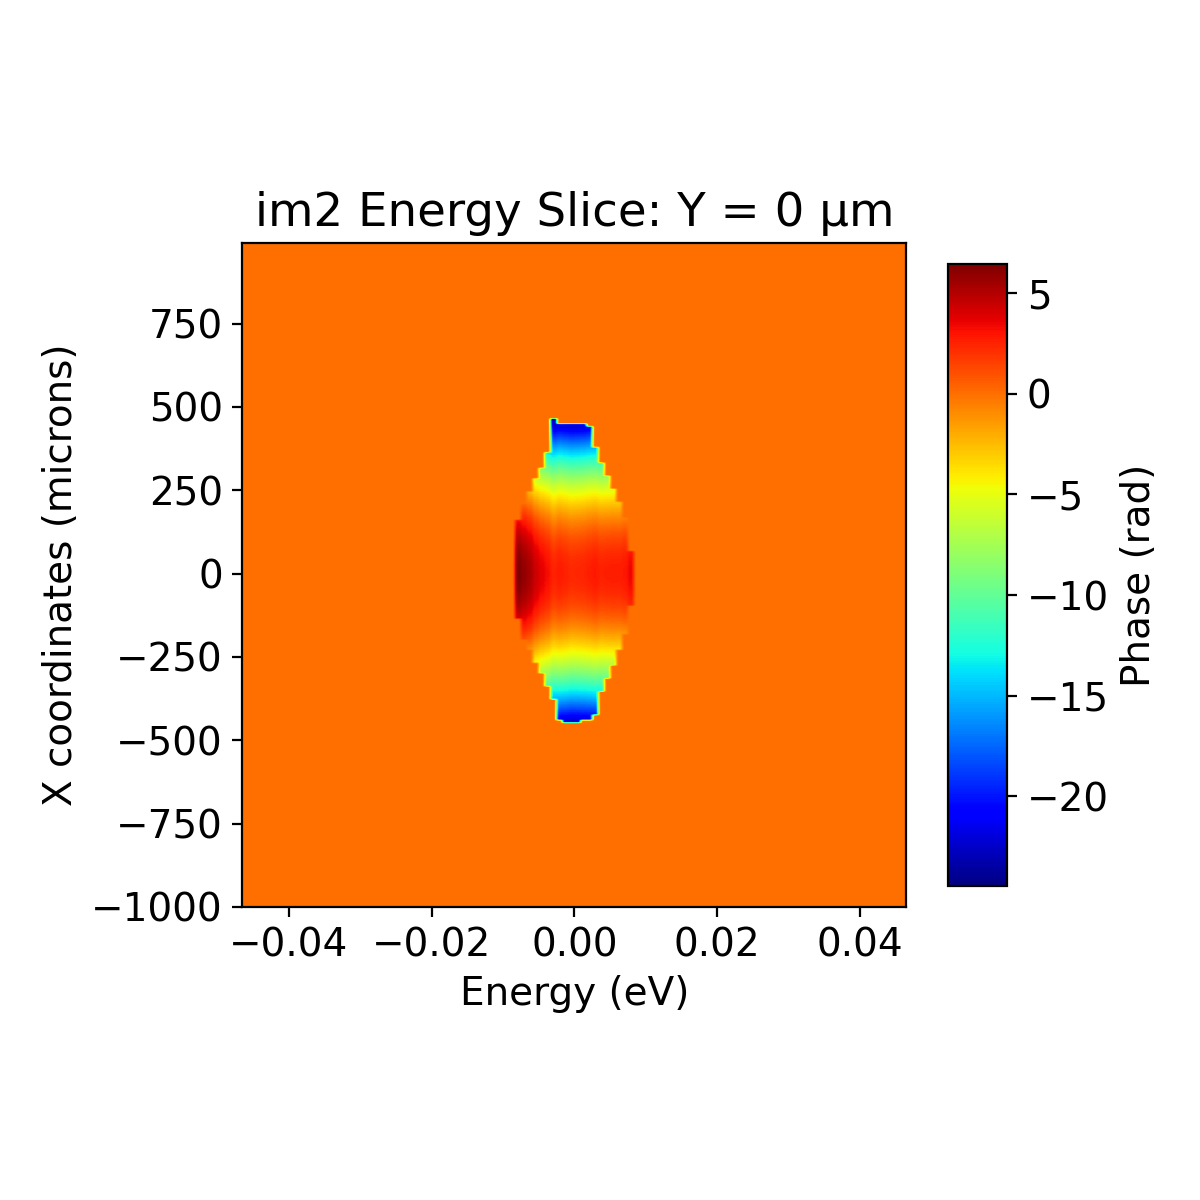

(-31.910419293842818, 472)
[2.88       2.88014286 2.88028571 2.88042857 2.88057143 2.88071429
 2.88085714 2.881      2.88114286 2.88128571 2.88142857 2.88157143
 2.88171429 2.88185714 2.882      2.88214286 2.88228571 2.88242857
 2.88257143 2.88271429 2.88285714 2.883      2.88314286 2.88328571
 2.88342857 2.88357143 2.88371429 2.88385714 2.884      2.88414286
 2.88428571 2.88442857 2.88457143 2.88471429 2.88485714 2.885
 2.88514286 2.88528571 2.88542857 2.88557143 2.88571429 2.88585714
 2.886      2.88614286 2.88628571 2.88642857 2.88657143 2.88671429
 2.88685714 2.887     ]


In [100]:
# plot output pulse at beam center
pulse.plot_pulse('im2', shift=600)
# plt.savefig(fig_path+'option1_output_pulse_no_slit.png')
# plot output spectraum at beam center
pulse.plot_spectrum('im2')
# plt.savefig(fig_path+'option1_output_spectrum_no_slit.png')
# show spatial projection of output
pulse.imshow_projection('im2')
# plt.savefig(fig_path+'option1_output_spatial_no_slit.png')
# show time slice of output
pulse.imshow_time_slice('im2', shift=200)
# plt.savefig(fig_path+'option1_output_time_no_slit.png')
# show energy slice of output
pulse.imshow_energy_slice('im2')
# plt.savefig(fig_path+'option1_output_energy_no_slit.png')
# show spectral phase slice of output
pulse.imshow_energy_slice('im2', image_type='phase')
print(pulse.pulse_duration('im2'))
f1 = np.linspace(2.88, 2.887, 50)
print(f1)

In [9]:
def define_devices(f1, f2):
    # crystal asymmetry angle
    alphaAsym = 19.88*np.pi/180

    # distance between crystal 2 and 1st CRL, 2nd CRL and crystal 4 
#     f1 = 2.884
    # distance between CRLs and focus
#     f2 = 3

    # crystal reflection hkl index
    hkl = [3,1,1]

    # initialize the beam
    b1 = beam.Beam(beam_params=beam_params)

    # viewing point upstream of monochromator
    im0 = optics.PPM('im0', z=870, FOV=2e-3, N=256)
    crl0 = optics.CRL('crl0', z=830, roc=1700e-6, diameter=2e-3)

    # first crystal: symmetric reflection
    crystal1 = optics.Crystal('c1', hkl=hkl, length=10e-2, width=20e-3, z=880, E0=E0,
                              alphaAsym=0, orientation=0, pol='s')

    # second crystal: asymmetric reflection, orientation flipped relative to crystal1
    crystal2 = optics.Crystal('c2', hkl=hkl, length=10e-2, width=20e-3, z=crystal1.z+.2, E0=E0,alphaAsym=alphaAsym, 
                              orientation=2,pol='s')
    # printing crystal incidence and reflection angles for confirmation
    print('crystal 2 incidence angle: {:.2f} degrees'.format(crystal2.alpha*180/np.pi))
    print('crystal 2 exit angle: {:.2f} degrees'.format(crystal2.beta0*180/np.pi))

    im_upstream = optics.PPM('im_upstream', z=crystal2.z + f1 - .1, FOV=2e-3, N=256)

    # CRL with ~1 meter focal length (modeled as single element for now)
    crl1 = optics.CRL('crl1', z=crystal2.z+f1, roc=25.25e-6, diameter=5e-3)

    # viewing point downstream of first crl
    im1 = optics.PPM('im1', z=crl1.z+.1,N=256,FOV=2e-3)

    # viewing point at focus
    focus = optics.PPM('focus', z=crl1.z+f2+.03, FOV=100e-6, N=256)

    # slit at focus
    slit = optics.Slit('slit', z=crl1.z+f2 + 1e-3+.03, x_width=4e-6, y_width=2e-3)

    # second CRL with ~1 meter focal length, for collimation
    crl2 = optics.CRL('crl2', z=crl1.z+2*f2, roc=25.25e-6, diameter=5e-3)

    # third crystal, symmetric reflection, same orientation as crystal2
    crystal3 = optics.Crystal('c3', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+2, E0=E0,alphaAsym=0, orientation=2,
                             asym_type='emergence',pol='s')

    # fourth crystal, asymmetric reflection, same orientation as crystal1
    crystal4 = optics.Crystal('c4', hkl=hkl, length=10e-2, width=10e-3, z=crl2.z+2 + (f1-2)*np.cos(crystal1.beta0*2), E0=E0,alphaAsym=-alphaAsym, 
                              asym_type='emergence', orientation=0,pol='s')

    # viewing point just downstream of monochromator
    im2 = optics.PPM('im2', z=crystal4.z+.1, FOV=2e-3, N=256)

    # list of devices to propagate through
    devices = [crl0,im0,crystal1,crystal2,im_upstream, im1, crl1, focus, crl2, crystal3, crystal4, im2]
    
    return devices

In [2]:
lambda0 = 1239.8/9000*1e-9
phase = 80
path = phase*lambda0/2/np.pi

In [3]:
print(path)

1.7539582084029499e-09


In [8]:
1/(1/6+1/3)

2.0

In [34]:
37/20

1.85

In [11]:
400/8

50.0

In [32]:
9*2/20

0.9

In [45]:
np.pi*(10e-6)**2/b1.lambda0

4.509166097001966